<a href="https://colab.research.google.com/github/amperry01/CPSC392-Data-Science/blob/main/LinearRegression_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *

from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import mean_squared_error, r2_score #model evaluation


%matplotlib inline

# 0. Together

## Linear Regression

$$\underbrace{Y_i}_\text{Observed Value for Person i} = \underbrace{\beta_0}_\text{intercept} + \underbrace{\beta_1}_\text{Coefficient for X1} * \underbrace{X_{i1}}_\text{Value for person i on Variable X1} + ... + \beta_p * X_{ip}$$


## Sklearn
Sklearn has a really consistent and elegant workflow for almost all the predictive models they have.

1. Separate your data into X (predictors) and y (outcome), and maybe do some model validation set up.
2. Create an Empty Model.
3. call `.fit()` using your training data
4. call `.predict()` on ANY X data to get the model prediction for that data.
5. call `.score()` to calculate the default model performance metric (but you can also specify which metric you want to use by using specific functions like `mean_squared_error()`), using the true outcomes and the  predicted values from your model.

This workflow is relatively consistent throughout all the supervised/predictive models we learn (you may even recognize `.fit()` from `StandardScaler()`!

## Linear Regression
Remember that *linear* regression fits straight lines (or flat planes/hyperplanes with multiple predictors) using the formula $Y = mx + b$. If the relationship between the predictor and the outcome is not linear, then the model may not perform well. And more importantly, it will likely perform badly SPECIFICALLY for certain ranges of values. Think about an example where it might be especially problematic for our model to be worse at predicting (and/or consistently under or over predicts) for certain ranges of predictors?

## What IS non-linear?

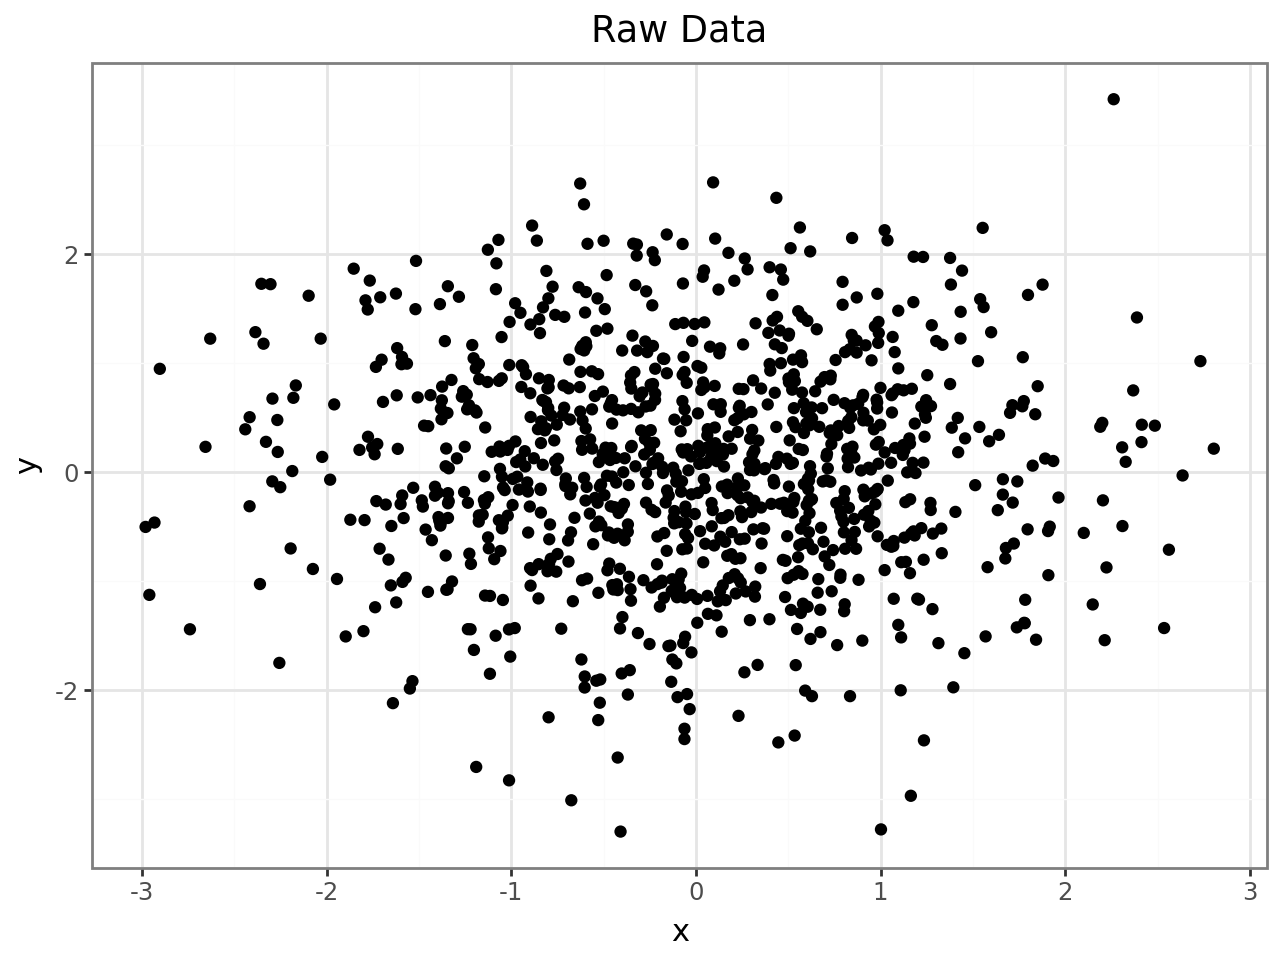

In [2]:
# no relationship but linear
x = np.random.normal(loc = 0, scale = 1, size = 1000)
y = x*0 + np.random.normal(loc = 0, scale = 1, size = 1000)

df = pd.DataFrame({"x": x,
                  "y": y})

(ggplot(df, aes(x = "x", y = "y")) + geom_point() + theme_bw() + labs(title = "Raw Data"))

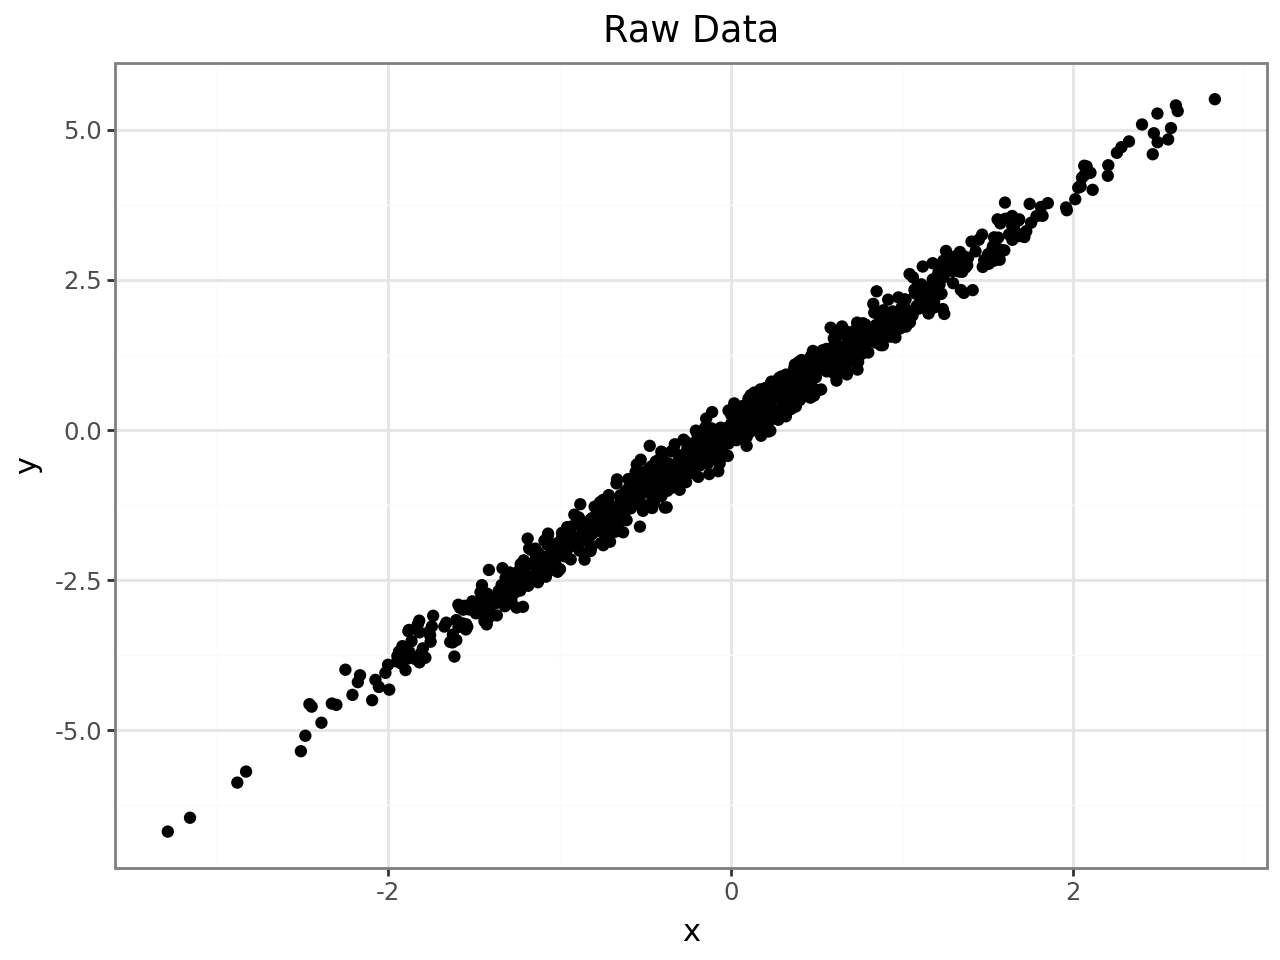

In [3]:
# strong relationship but linear
x = np.random.normal(loc = 0, scale = 1, size = 1000)
y = x*2 + np.random.normal(loc = 0, scale = 0.2, size = 1000)

df = pd.DataFrame({"x": x,
                  "y": y})

(ggplot(df, aes(x = "x", y = "y")) + geom_point() + theme_bw() + labs(title = "Raw Data"))

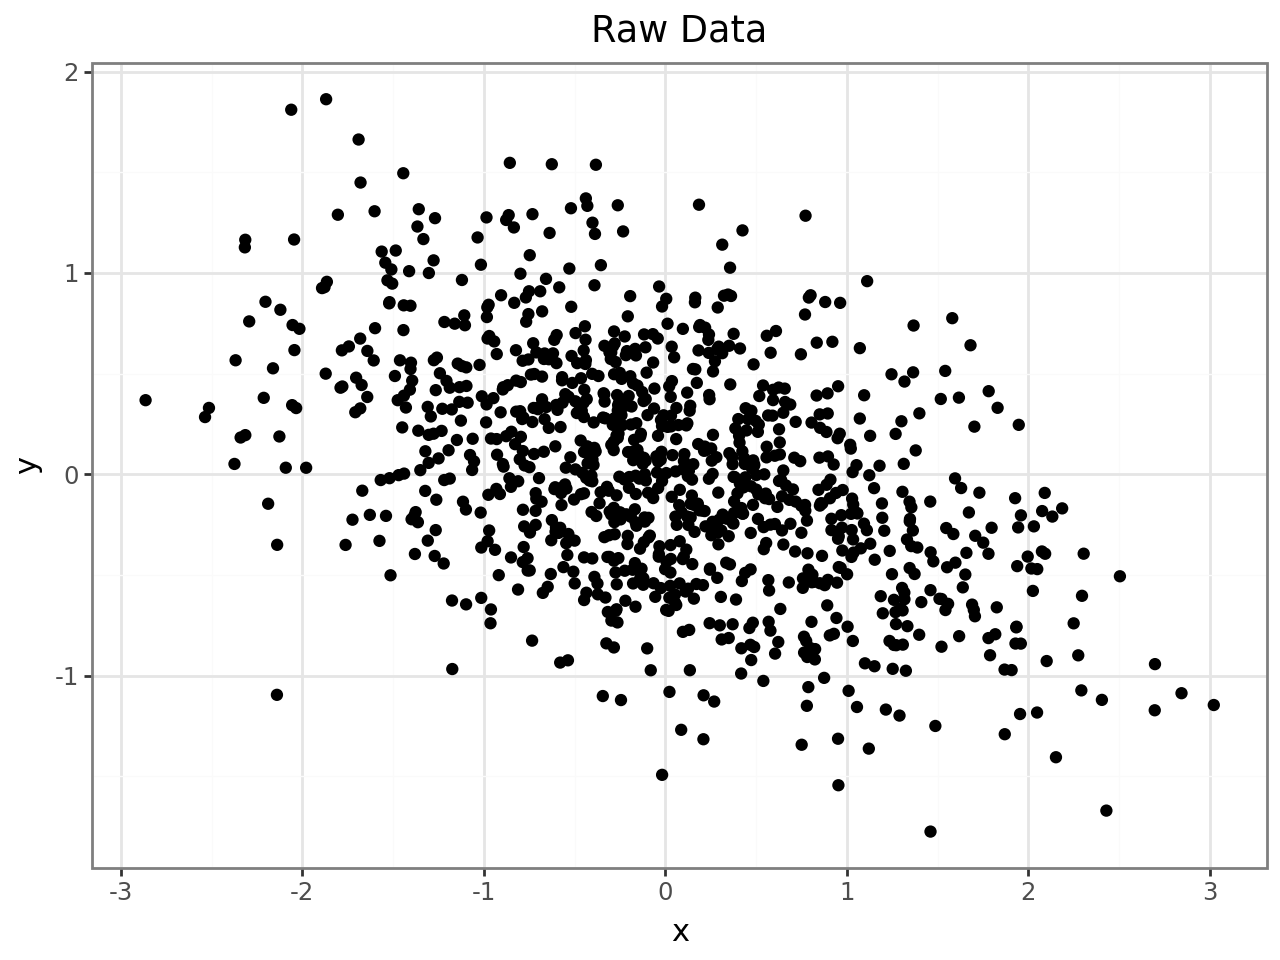

In [4]:
# weaker relationship but linear
x = np.random.normal(loc = 0, scale = 1, size = 1000)
y = x*-0.25 + np.random.normal(loc = 0, scale = 0.5, size = 1000)

df = pd.DataFrame({"x": x,
                  "y": y})

(ggplot(df, aes(x = "x", y = "y")) + geom_point() + theme_bw() + labs(title = "Raw Data"))

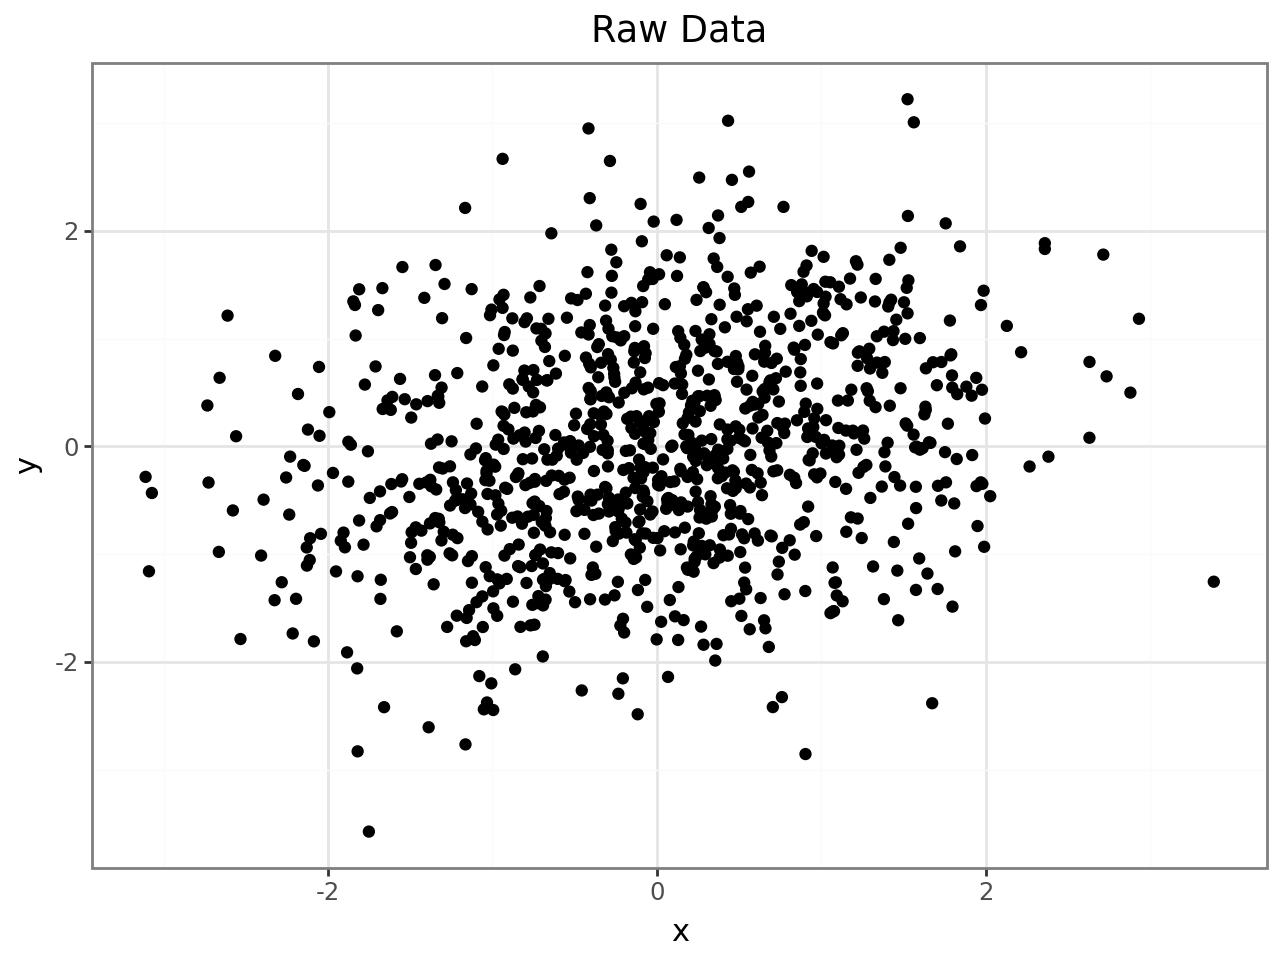

In [5]:
# weaker relationship but linear
x = np.random.normal(loc = 0, scale = 1, size = 1000)
y = x*0.25 + np.random.normal(loc = 0, scale = 1, size = 1000)

df = pd.DataFrame({"x": x,
                  "y": y})

(ggplot(df, aes(x = "x", y = "y")) + geom_point() + theme_bw() + labs(title = "Raw Data"))

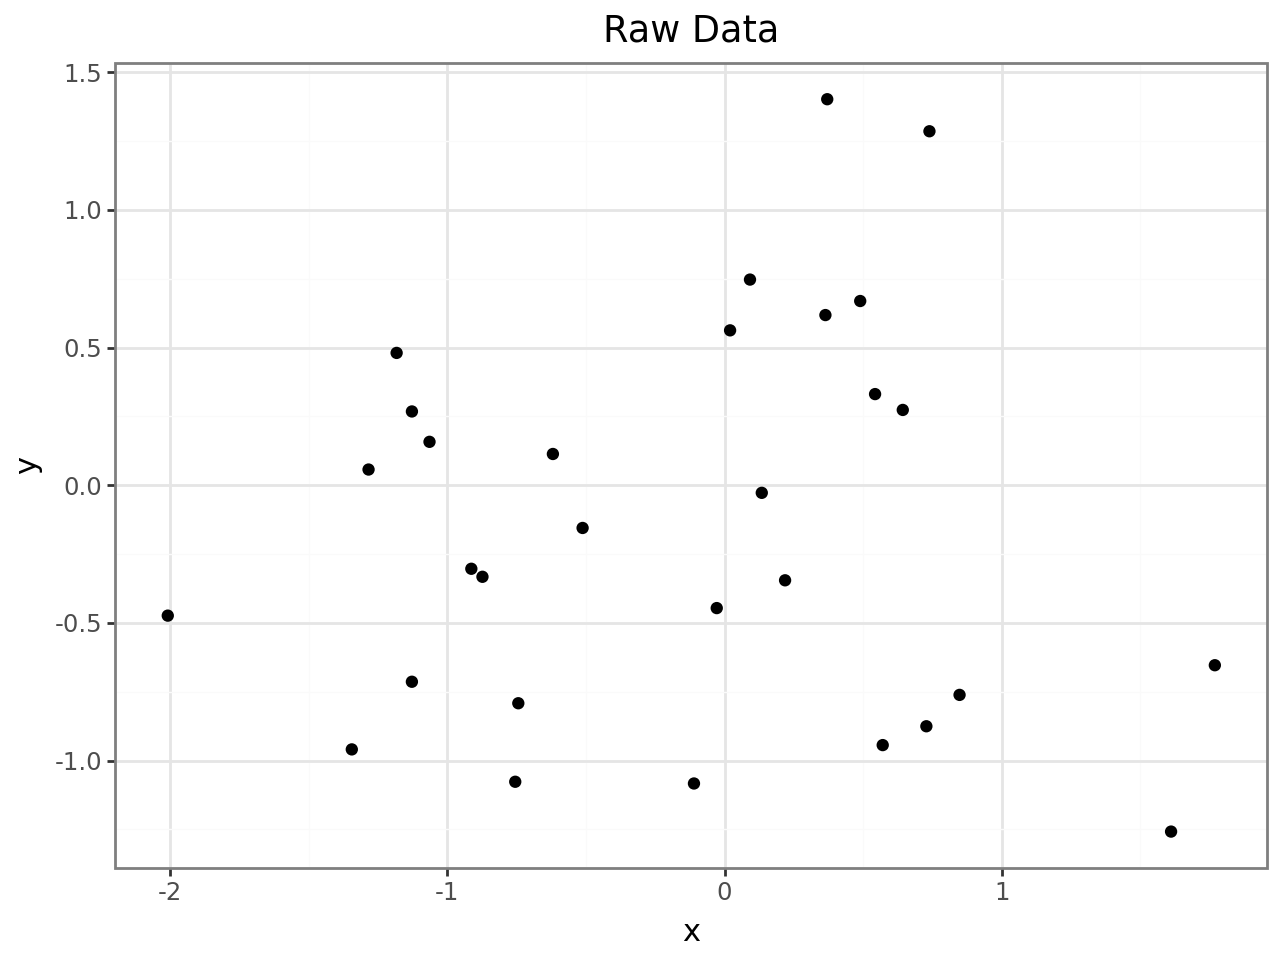

In [6]:
# weak relationship, small data but linear
x = np.random.normal(loc = 0, scale = 1, size = 30)
y = x*0.25 + np.random.normal(loc = 0, scale = 0.75, size = 30)

df = pd.DataFrame({"x": x,
                  "y": y})

(ggplot(df, aes(x = "x", y = "y")) + geom_point() + theme_bw() + labs(title = "Raw Data"))

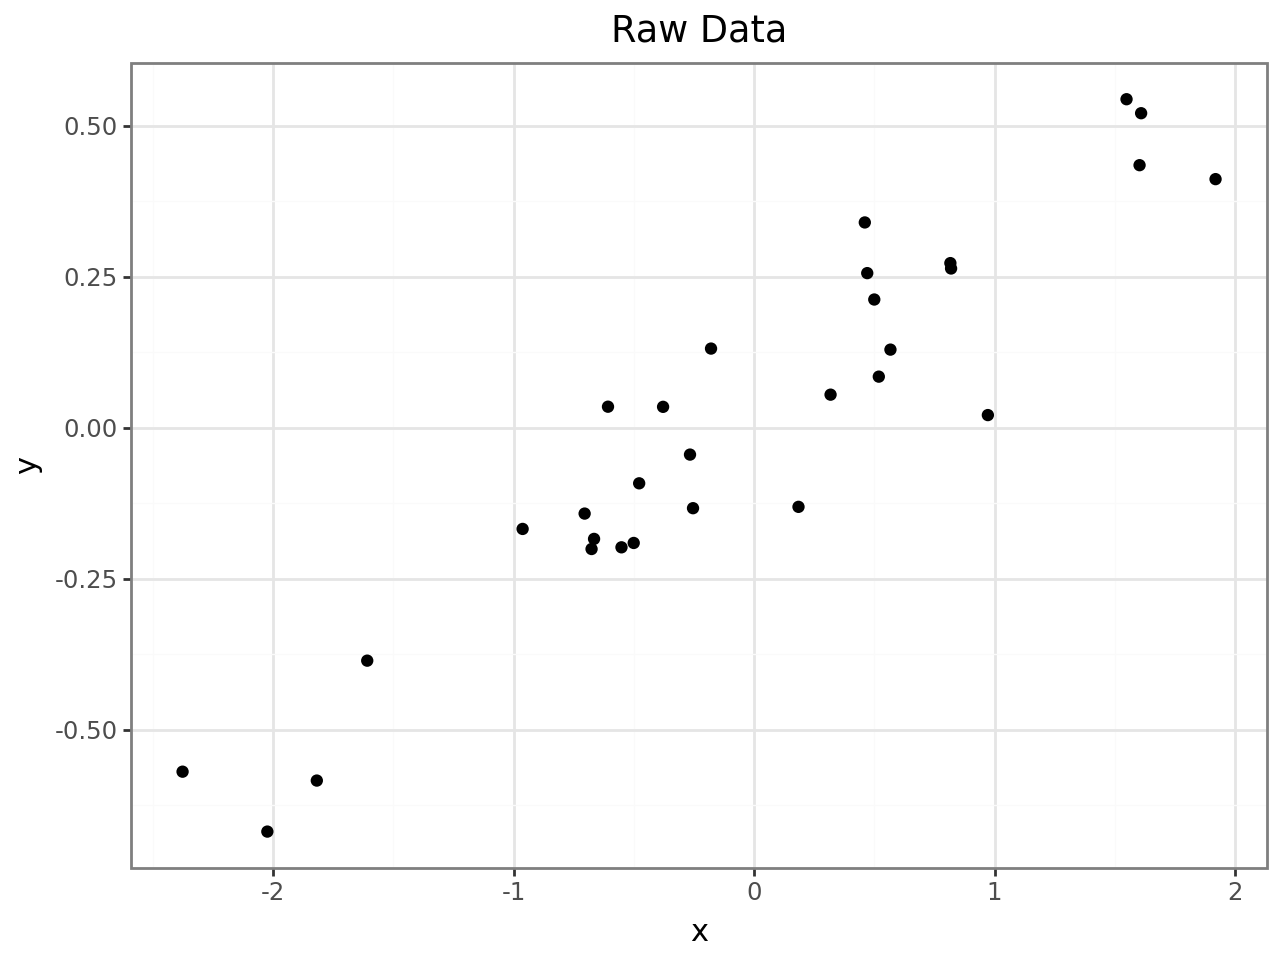

In [7]:
# STRONG relationship, small data but linear
x = np.random.normal(loc = 0, scale = 1, size = 30)
y = x*0.25 + np.random.normal(loc = 0, scale = 0.1, size = 30)

df = pd.DataFrame({"x": x,
                  "y": y})

(ggplot(df, aes(x = "x", y = "y")) + geom_point() + theme_bw() + labs(title = "Raw Data"))

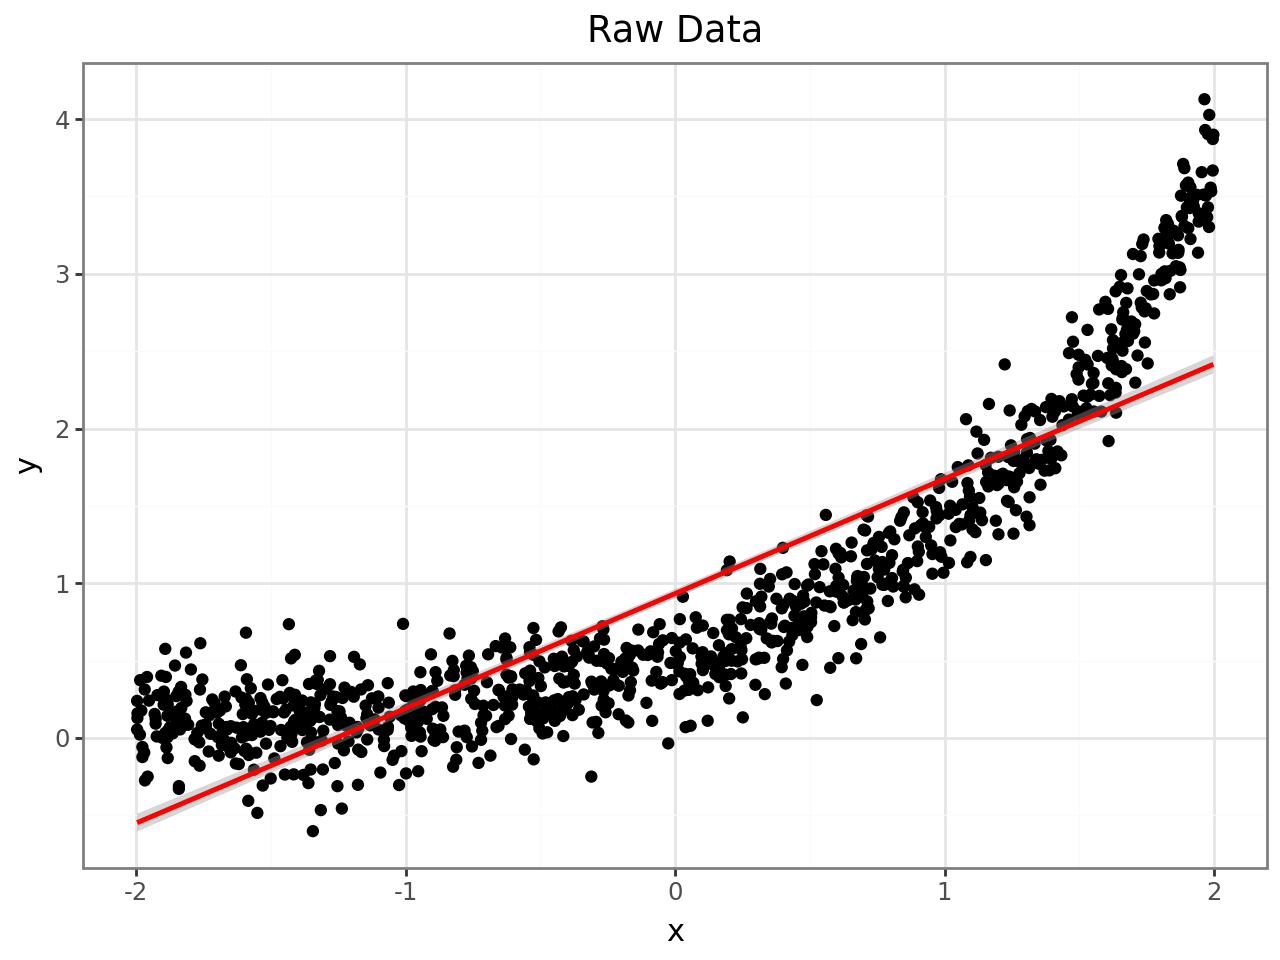

In [8]:
# strong relationship but NONlinear
x = np.random.uniform(low = -2, high = 2, size = 1000)
y = np.exp(x)*0.5 + np.random.normal(loc = 0, scale = 0.2, size = 1000)

df = pd.DataFrame({"x": x,
                  "y": y})

(ggplot(df, aes(x = "x", y = "y")) + geom_point() + theme_bw() + geom_smooth(method = "lm", color = "red") + labs(title = "Raw Data"))

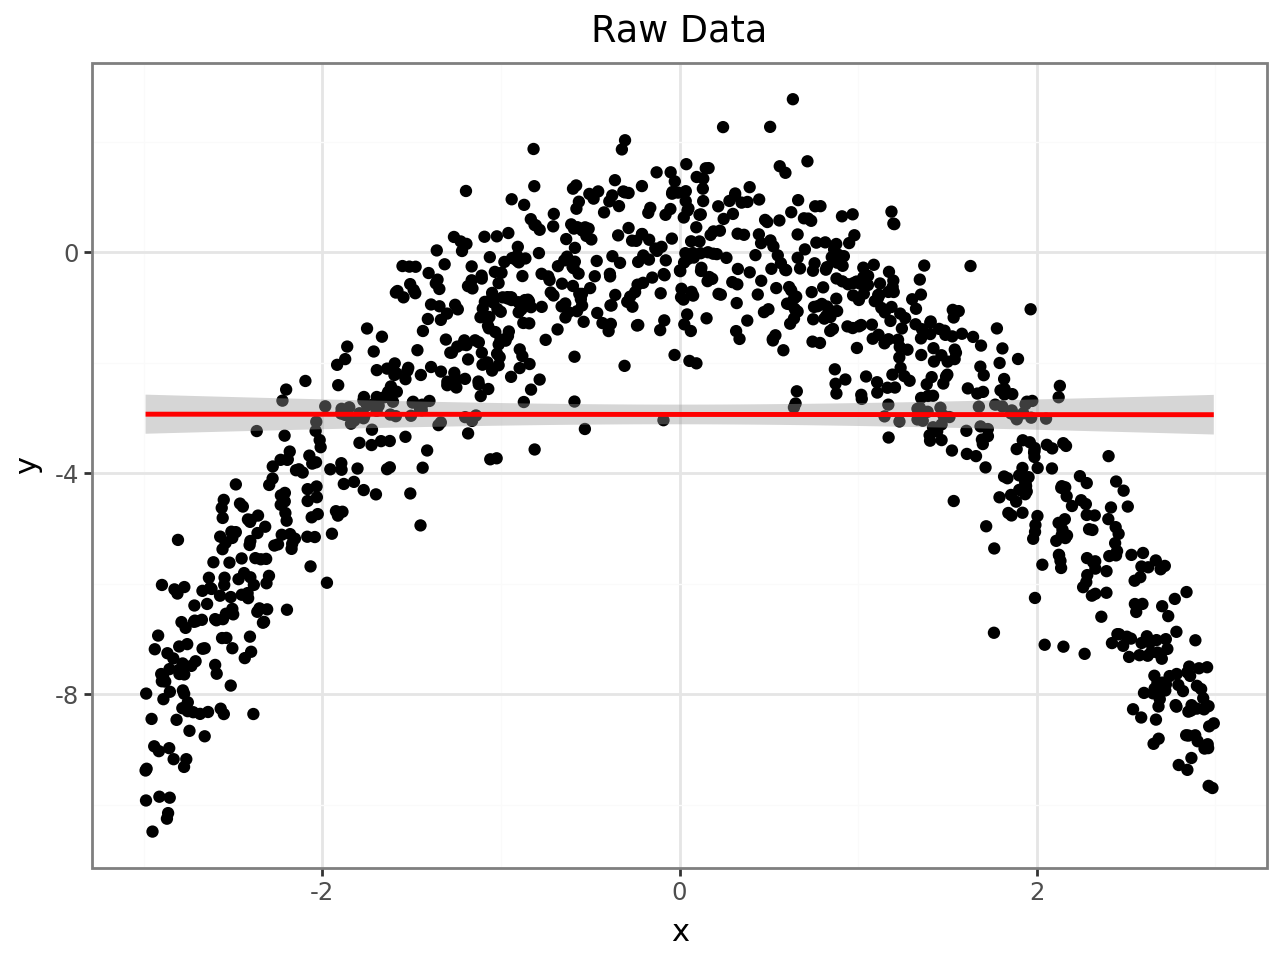

In [9]:
# medium relationship but NONlinear
x = np.random.uniform(low = -3, high = 3, size = 1000)
y = -1*x**2 + np.random.normal(loc = 0, scale = 1, size = 1000)

df = pd.DataFrame({"x": x,
                  "y": y})

(ggplot(df, aes(x = "x", y = "y")) + geom_point() + theme_bw() + geom_smooth(method = "lm", color = "red") + labs(title = "Raw Data"))

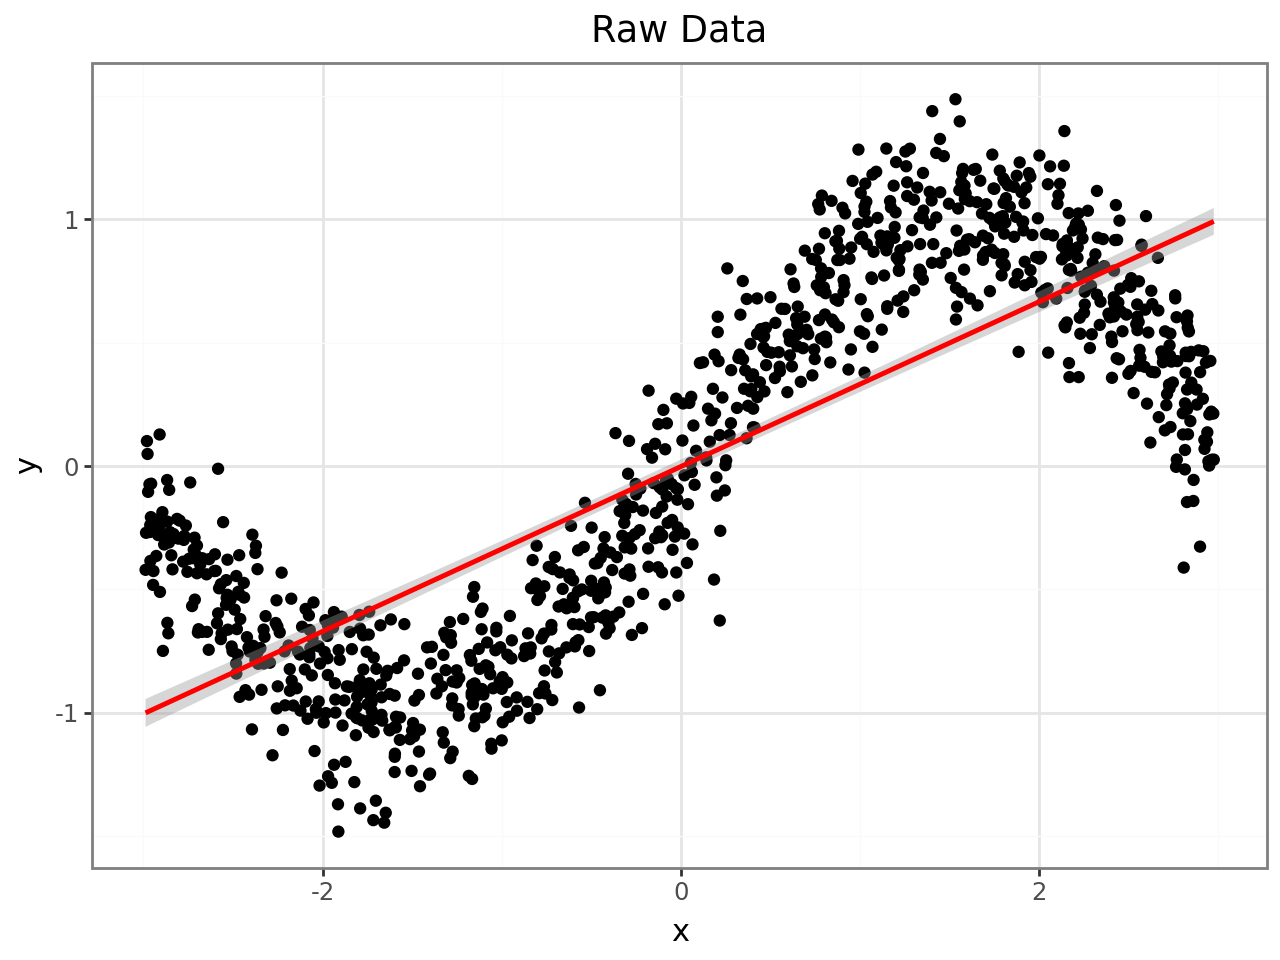

In [10]:
# strong relationship but NONlinear
x = np.random.uniform(low = -3, high = 3, size = 1000)
y = np.sin(x) + np.random.normal(loc = 0, scale = 0.2, size = 1000)

df = pd.DataFrame({"x": x,
                  "y": y})

(ggplot(df, aes(x = "x", y = "y")) + geom_point() + theme_bw() + geom_smooth(method = "lm", color = "red") + labs(title = "Raw Data"))

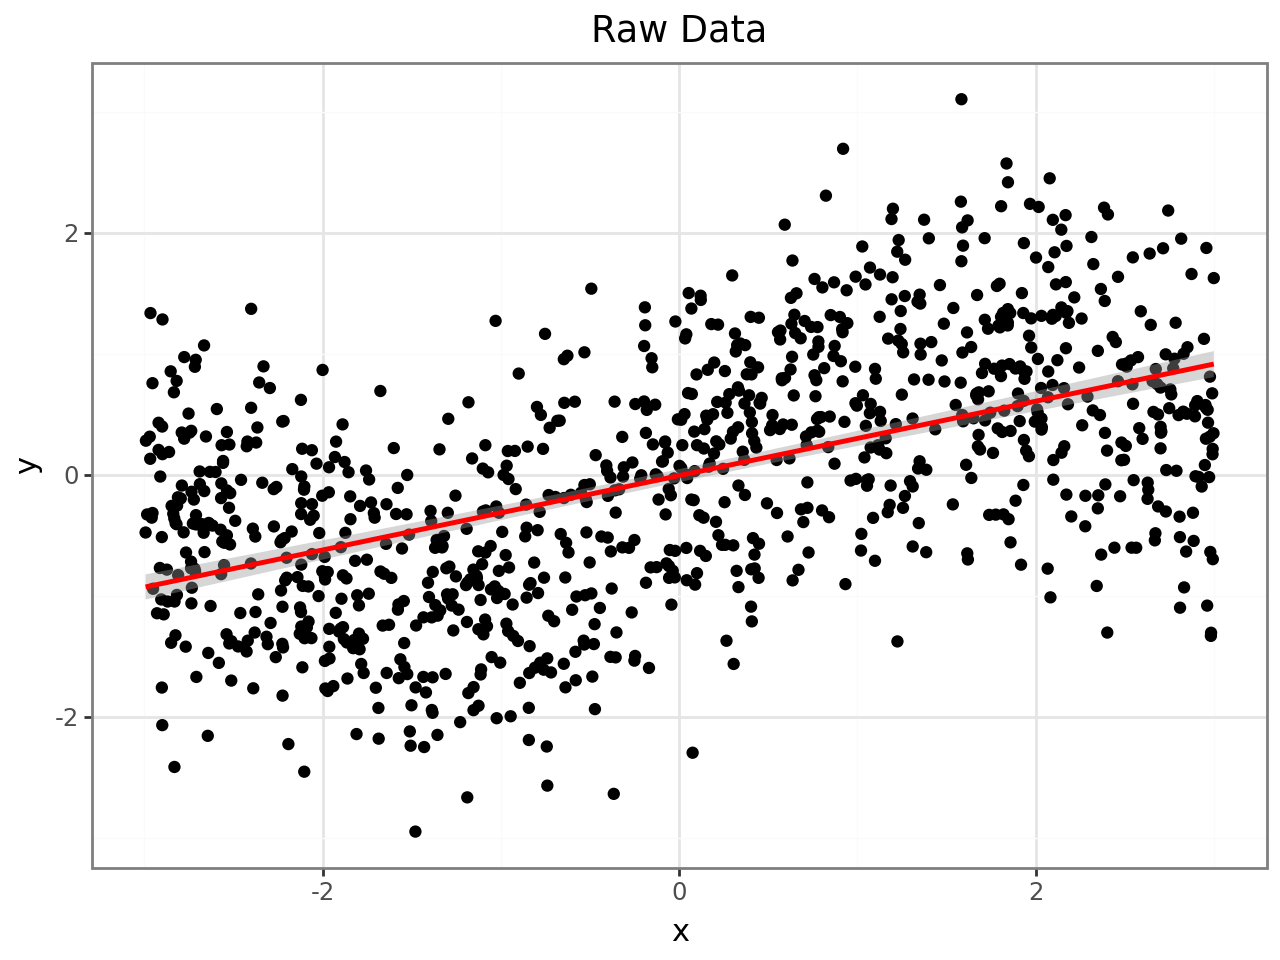

In [11]:
# weaker relationship but NONlinear
x = np.random.uniform(low = -3, high = 3, size = 1000)
y = np.sin(x) + np.random.normal(loc = 0, scale = 0.75, size = 1000)

df = pd.DataFrame({"x": x,
                  "y": y})

(ggplot(df, aes(x = "x", y = "y")) + geom_point() + theme_bw() + geom_smooth(method = "lm", color = "red") + labs(title = "Raw Data"))

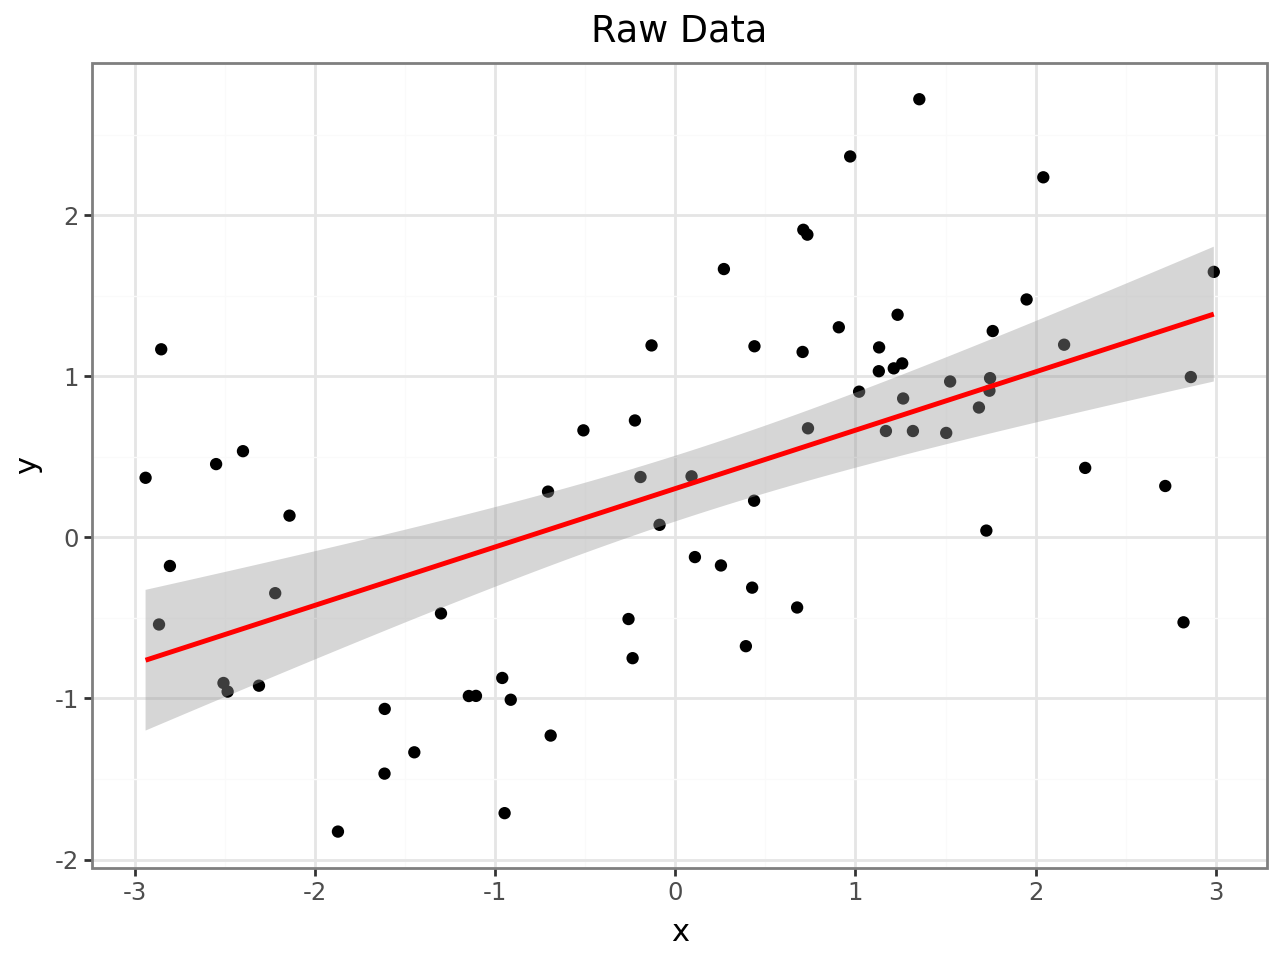

In [12]:
# weaker relationship, small data but NONlinear

### SOMETIMES IT CAN BE HARD TO TELL!

x = np.random.uniform(low = -3, high = 3, size = 70)
y = np.sin(x) + np.random.normal(loc = 0, scale = 0.75, size = 70)

df = pd.DataFrame({"x": x,
                  "y": y})

(ggplot(df, aes(x = "x", y = "y")) + geom_point() + theme_bw() + geom_smooth(method = "lm", color = "red") + labs(title = "Raw Data"))

## What IS Heteroskedastic?
Linear Regression assumes *homo*skedasticity meaning the variance is the same across all predicted values of the model.

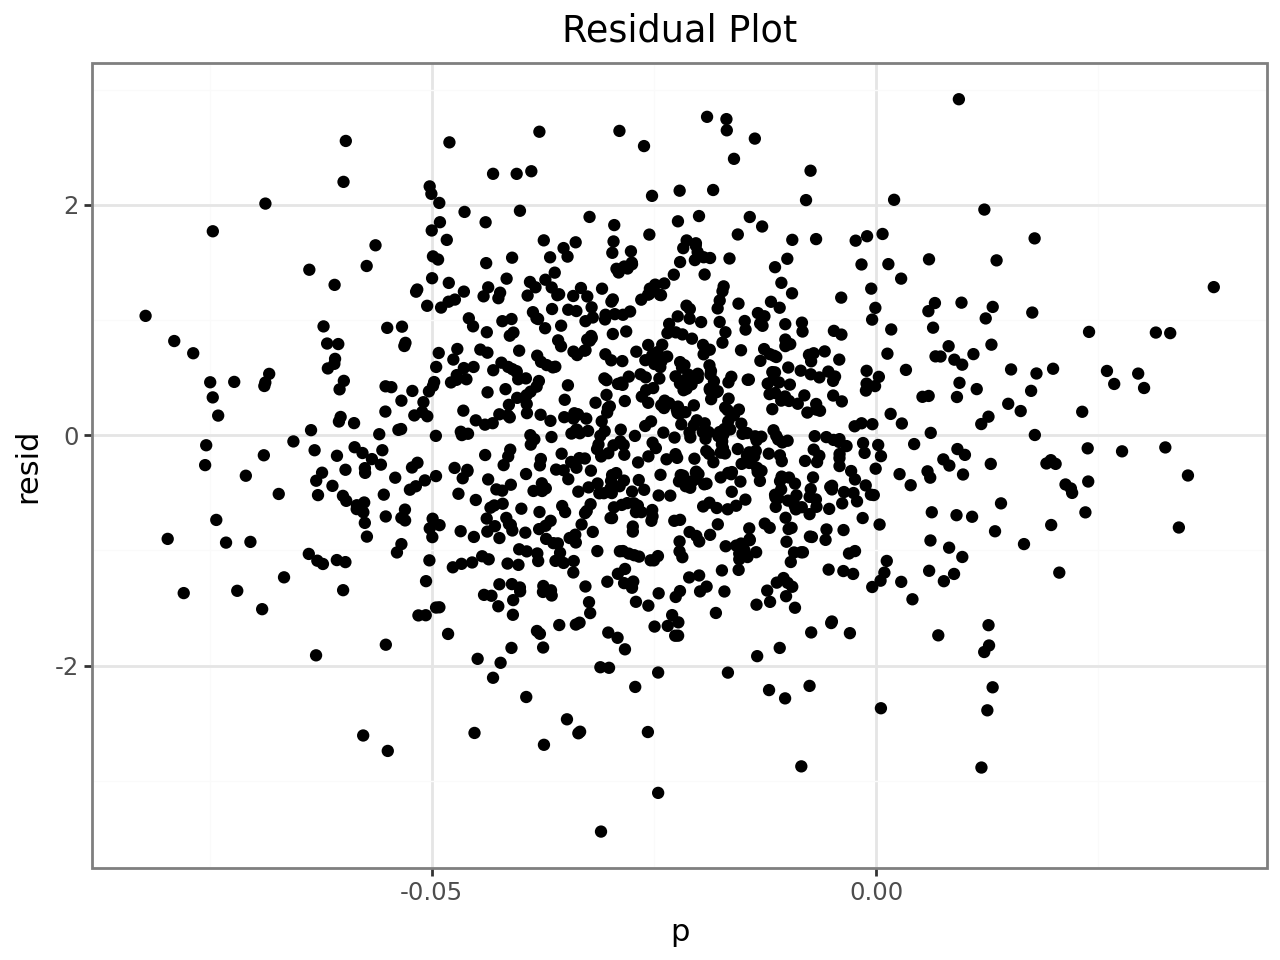

In [13]:
# no relationship but linear
x = np.random.normal(loc = 0, scale = 1, size = 1000)
y = x*0 + np.random.normal(loc = 0, scale = 1, size = 1000)

df = pd.DataFrame({"x": x,
                  "y": y})

# you have to do this when you only have ONE predictor
x = x.reshape(-1,1)

# create model
m = LinearRegression()

# fit model
m.fit(x,y)

# predict
p = m.predict(x)

# store predictions, calculate residuals, store residuals
df["predicted"] = p
resid = y-p
df["resid"] = resid

#plot
resid_plot = (ggplot(df, aes(x = "p", y = "resid")) + geom_point() + theme_bw() + labs(title = "Residual Plot"))
raw_plot = (ggplot(df, aes(x = "x", y = "y")) + geom_point() + theme_bw() + labs(title = "Raw Data"))

resid_plot



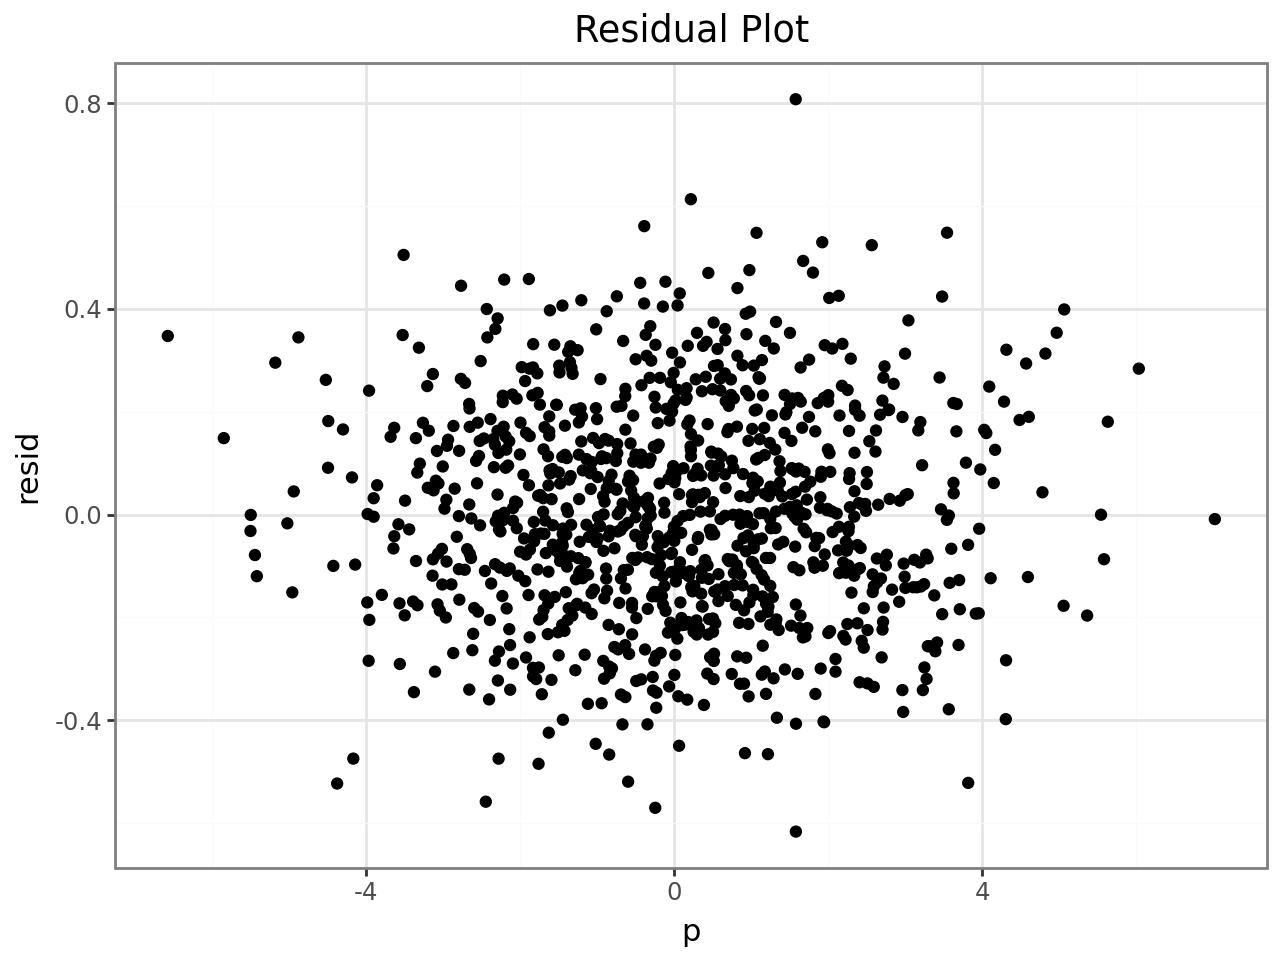

In [14]:
# strong relationship but linear
x = np.random.normal(loc = 0, scale = 1, size = 1000)
y = x*2 + np.random.normal(loc = 0, scale = 0.2, size = 1000)

df = pd.DataFrame({"x": x,
                  "y": y})

# you have to do this when you only have ONE predictor
x = x.reshape(-1,1)

# create model
m = LinearRegression()

# fit model
m.fit(x,y)

# predict
p = m.predict(x)

# store predictions, calculate residuals, store residuals
df["predicted"] = p
resid = y-p
df["resid"] = resid

#plot
resid_plot = (ggplot(df, aes(x = "p", y = "resid")) + geom_point() + theme_bw() + labs(title = "Residual Plot"))
raw_plot = (ggplot(df, aes(x = "x", y = "y")) + geom_point() + theme_bw() + labs(title = "Raw Data"))

resid_plot


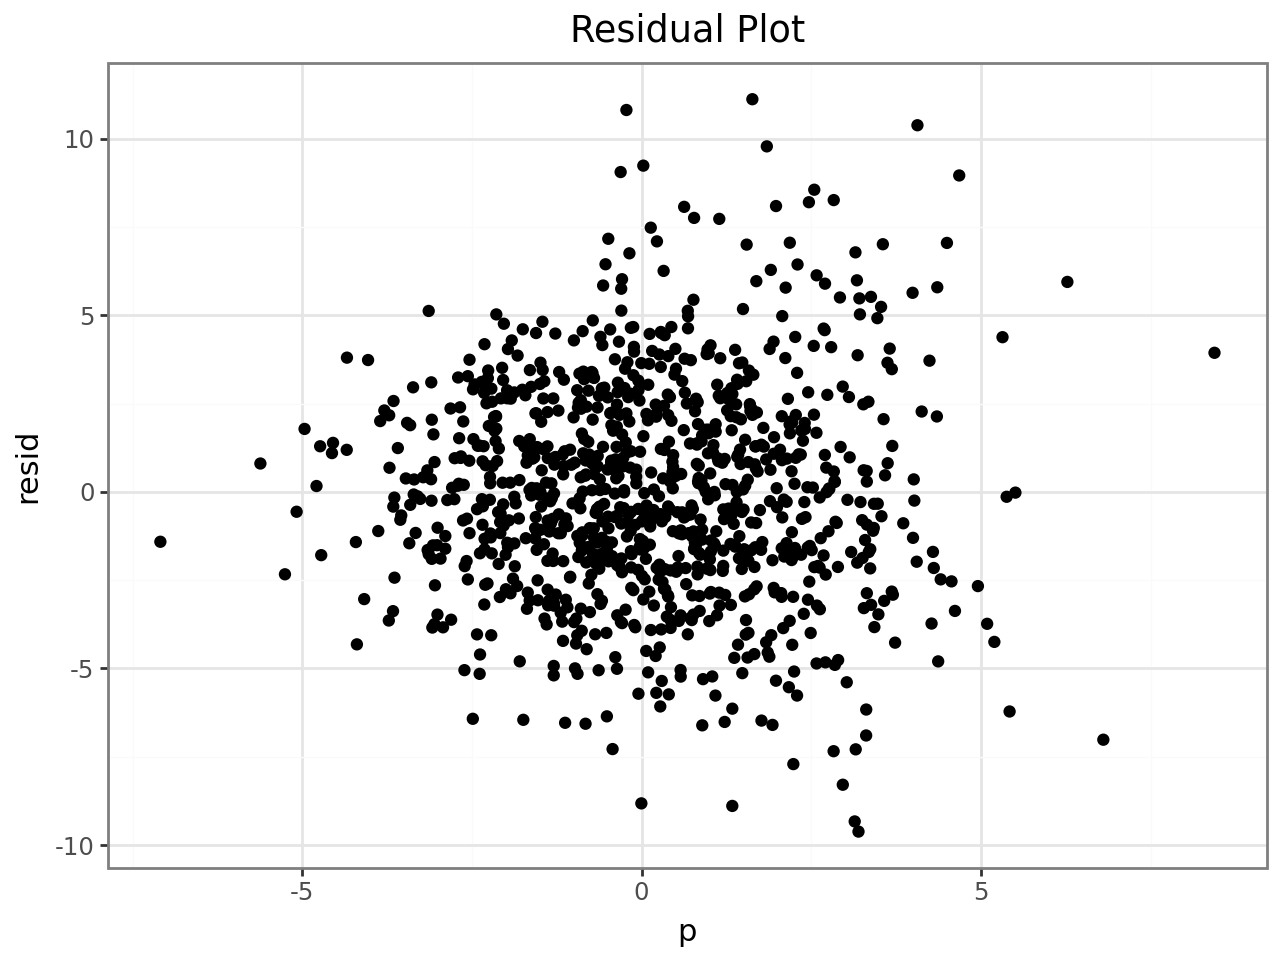

In [15]:
# linear relationship, heteroskedastic
x = np.random.normal(loc = 0, scale = 1, size = 1000)
y = x*2 + np.random.normal(loc = 0, scale = (x+6)/2, size = 1000)
df = pd.DataFrame({"x": x,
                  "y": y})

# you have to do this when you only have ONE predictor
x = x.reshape(-1,1)

# create model
m = LinearRegression()

# fit model
m.fit(x,y)

# predict
p = m.predict(x)

# store predictions, calculate residuals, store residuals
df["predicted"] = p
resid = y-p
df["resid"] = resid

#plot
resid_plot = (ggplot(df, aes(x = "p", y = "resid")) + geom_point() + theme_bw() + labs(title = "Residual Plot"))
raw_plot = (ggplot(df, aes(x = "x", y = "y")) + geom_point() + theme_bw() + labs(title = "Raw Data"))

resid_plot


# 1. Simulating Data

In the following code block, I'm creating FAKE data in order to demonstrate how linear regression works. You won't be tested on how to write this kind of code directly (if you ever need to write it yourself, you'll be able to look it up and ask for help) but try to see if you understand what's going on.

Each time you use a np.random.XXXX function, you'll get *different* fake data, because it's randomly generated. Try it out! If you want your data to come out the SAME each time, add the line `np.random.seed(XXXX)` at the top of the next cell, where `XXXX` is any integer you want like 42, 8675309, or 1234.

## 1.1 Linear Regression Data Generation

In [16]:
# set population values for Cat length
np.random.seed(8675309)

# mean cat length in cm
mean_length_cm = 170

# standard deviation of cat length in cm
sd_length_cm = 15

# number of samples
n = 100

# generate random data for cat length that follows a normal distribution
length = np.random.normal(loc = mean_length_cm, scale = sd_length_cm, size = n)

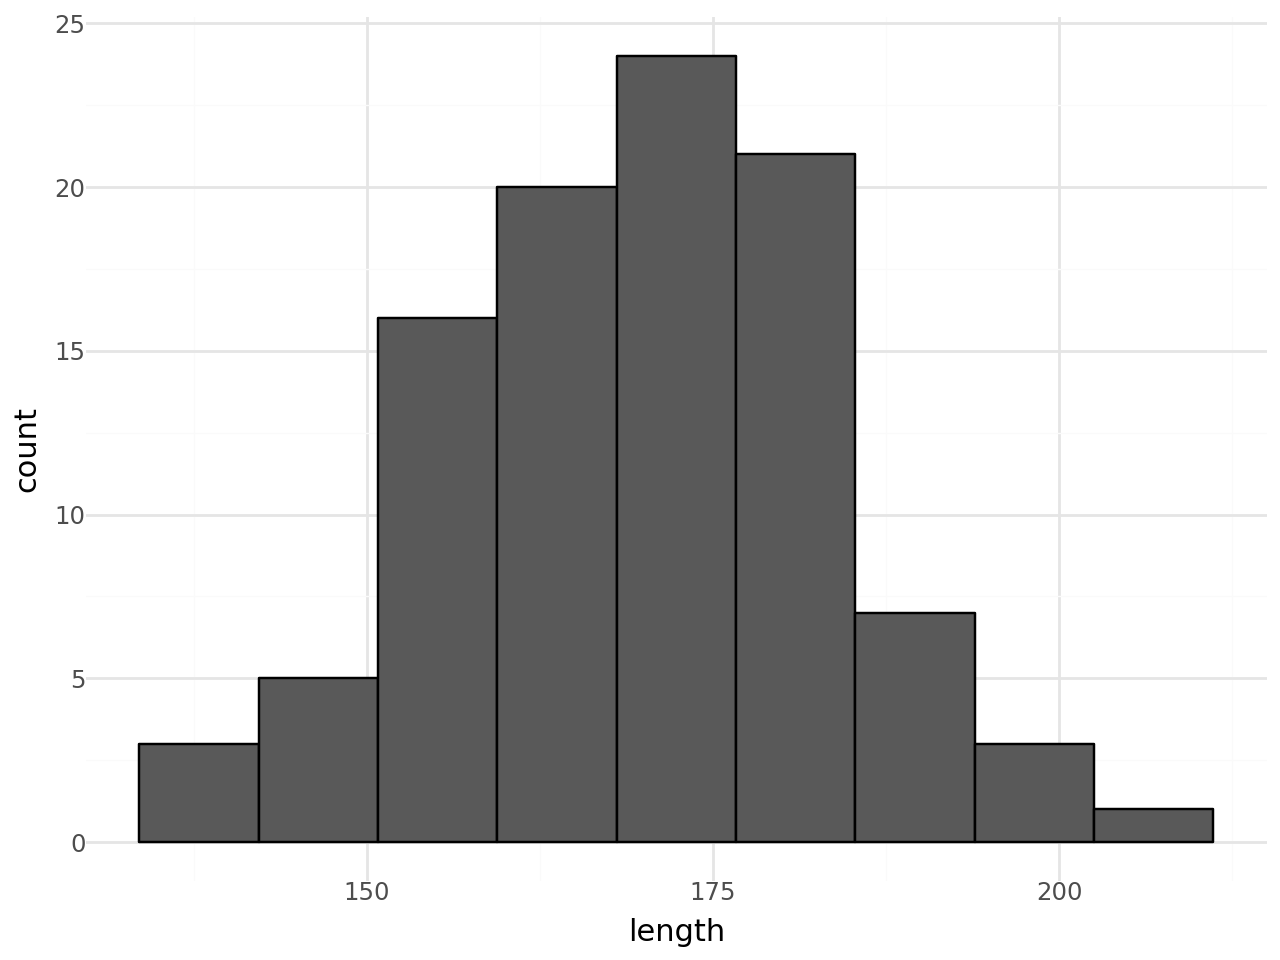

In [17]:
# plot cat length data----
(ggplot(pd.DataFrame({"length": length}),
       aes(x = "length")) +
geom_histogram(color = "black") +
theme_minimal())

In [18]:
# Set TRUE relationship between cat length and cat weight----
# true relationship between cat length and cat weight?
# i.e. As length increases by 1 cm, how much do we expect weight to increase?
true_coef = 0.04

# intercept: the expected weight of a cat that is 0 cm (doesn't make sense but that's math for you)
intercept = 0.2

In [19]:
# generate cat weights using list comprehension----

weight = intercept + length*true_coef + np.random.normal(0,1,n) # weight = intercept + length*coefficient + random error

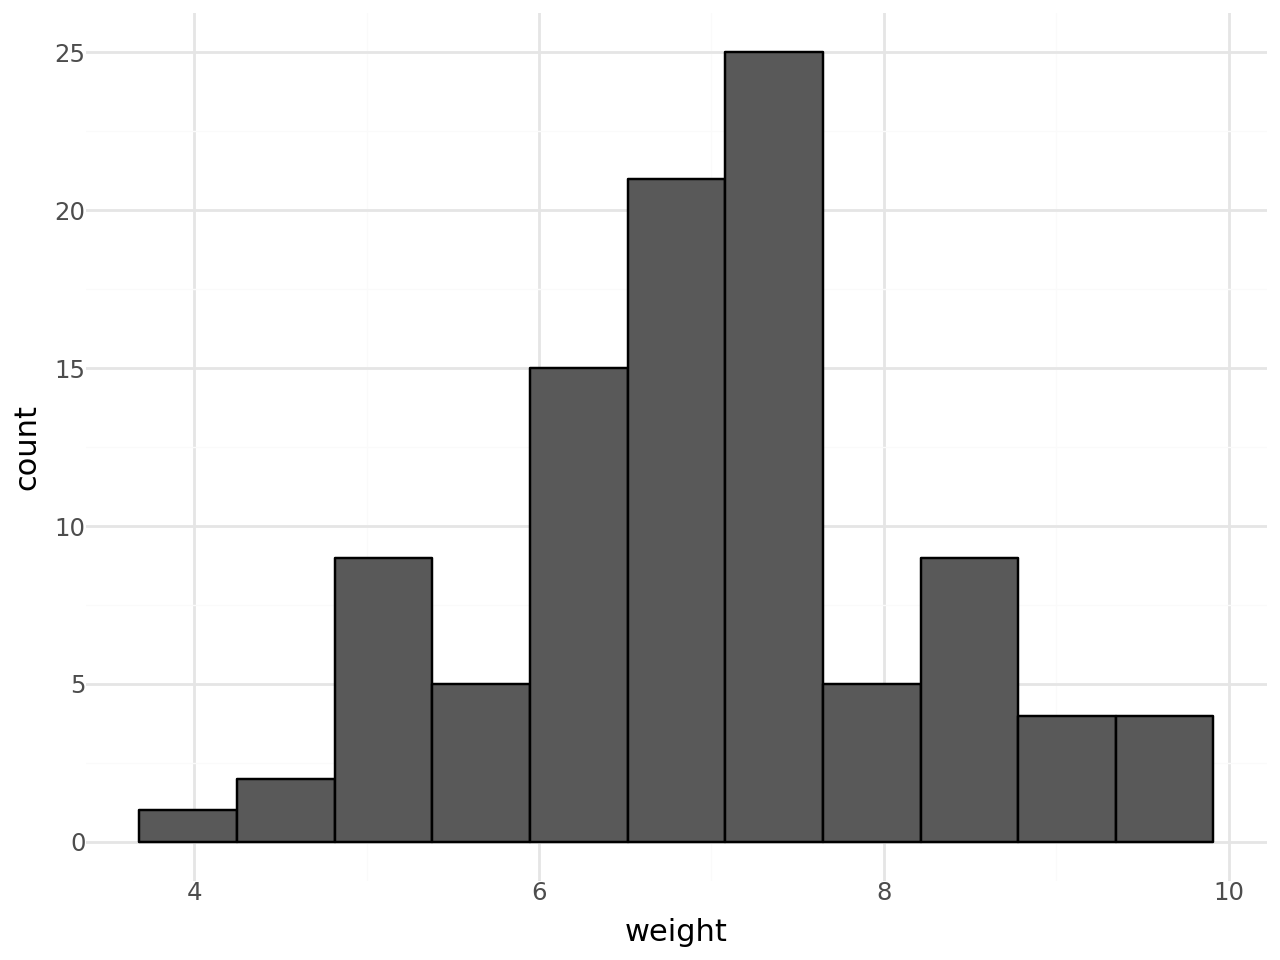

In [20]:
# plot cat weight data as a histogram----
##############################################
(ggplot(pd.DataFrame({"weight": weight}),
       aes(x = "weight")) +
geom_histogram(color = "black") +
theme_minimal())
##############################################

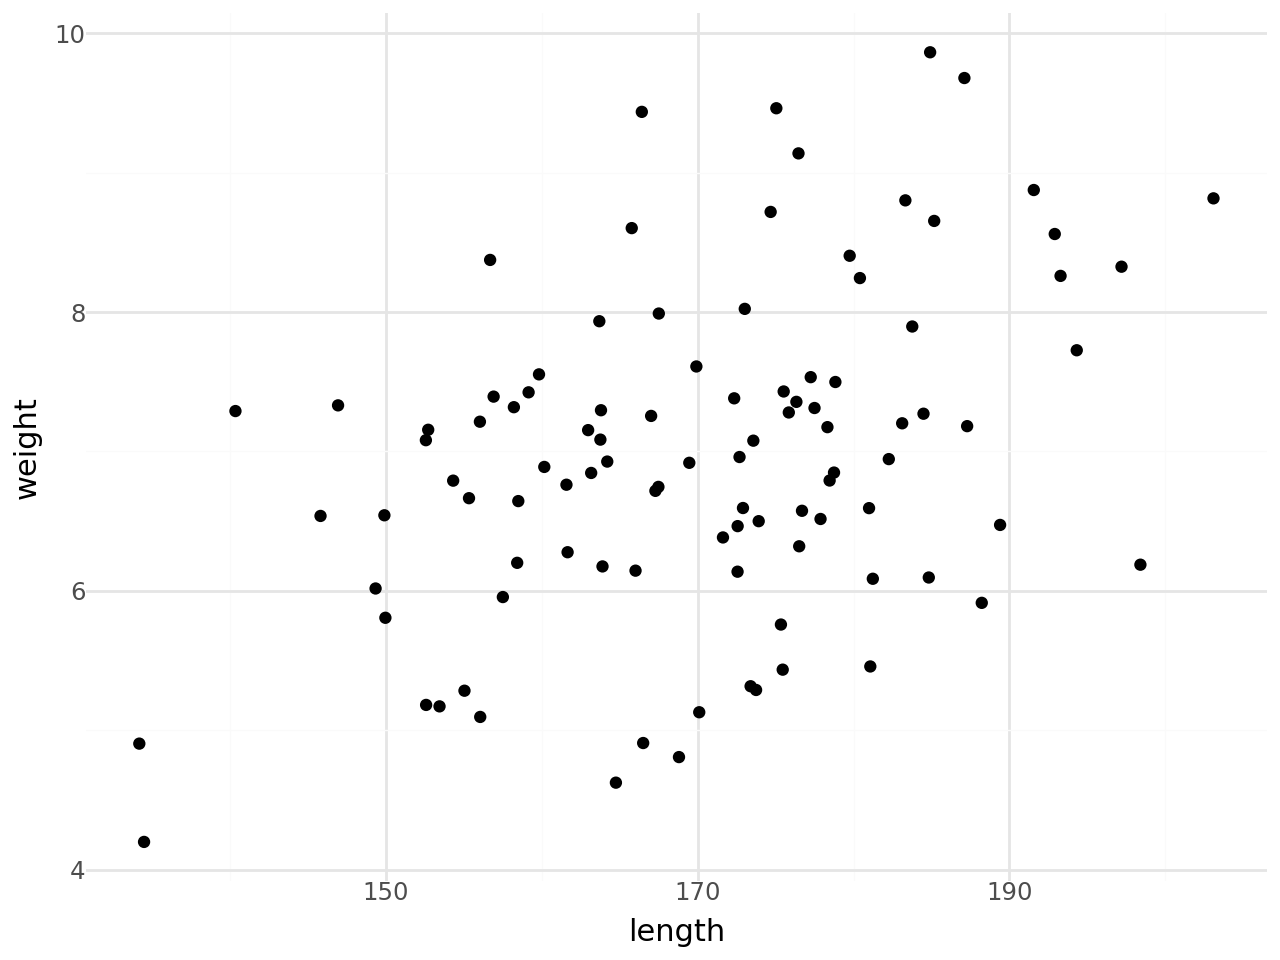

In [21]:
# plot cat weight by cat length----
##############################################
(ggplot(pd.DataFrame({"length": length}),
       aes(x = "length",y="weight")) +
geom_point(color = "black") +
theme_minimal())
##############################################

## 1.2 Fitting a Regression Model

In [22]:
cats = pd.DataFrame({"length": length, "weight": weight})

features = ["length"]
X = cats[features]
y = cats[["weight"]] #if you don't have the extra brackets, y will be a series instead of an array and throw an error


##############################################
# run a linear regression
lr = LinearRegression() # create the model object

# fit the linear regression model using X and y
lr.fit(X,y)
##############################################


LinearRegression()

In [23]:
# grab the coefficients from the model and store them in a data frame----

coef = pd.DataFrame({"Coef": lr.coef_[0], "Names": features})
coef = coef._append({"Coef": lr.intercept_[0], "Names": "intercept"}, ignore_index = True)
coef

,Coef,Names
0,0.034702,length
1,1.056641,intercept


The coefficient of length is 0.034702, and the intercept is 1.056641. The coefficient of length indicates that as length increases by 1 cm, we expect weight to increase by 0.035 kg.

### *Question*

Compare that to the TRUE population values we set above (hint: print `true_coef` and `intercept`). How close are the numbers from *this* linear regression to the true values? What do you think will happen if we created another random sample? 100 random samples?

<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" alt="Q" style="width: 200px;"/>

In [24]:
### YOUR CODE HERE ###
print("The true coefficient for length is:", true_coef)
print("The intercept is:", intercept)
print("The estimated coefficient for length is:", round(lr.coef_[0][0],3))
print("The estimated intercept is:", round(lr.intercept_[0],3))

The true coefficient for length is: 0.04
The intercept is: 0.2
The estimated coefficient for length is: 0.035
The estimated intercept is: 1.057


 ### YOUR ANSWERS HERE ###

The numbers for coef are fairly close, with the estimate underestimating the slope slightly. This is expected since we trained on a random sample and not the entire population.
There is a larger gap in the intercepts. This is also expected due to sampling variability from sampling error or noise.

If you were to take another random sample, the estimates would change. Some samples may give slope and intercept values closer to the true ones, while others may be further away. If you were to take 100 random samples, the estimates would form a sampling distribution centered near the true coefficient and intercept. On average, the estimates would approach the true population values, but each individual sample will differ due to sampling variability.

# 2. Fitting Linear Regressions on Multiple Datasets

In [25]:
def lr(n = 100, trueCoef = 0.04, intercept = 0.2, error_sd = 1):

    # mean cat length in cm
    mean_length_cm = 170
    # standard deviation of cat length in cm
    sd_length_cm = 15

    # generate random data for cat length that follows a normal distribution
    length = np.random.normal(loc = mean_length_cm, scale = sd_length_cm, size = n)
    weight = intercept + length*true_coef + np.random.normal(0,error_sd,n)
    # weight = intercept + length*coefficient + random error

    cats = pd.DataFrame({"length": length, "weight": weight})

    features = ["length"]
    X = cats[features]
    y = cats[["weight"]] #if you don't have the extra brackets, y will be a series instead of an array and throw an error

    ##############################################
    # run a linear regression
    lr = LinearRegression() # create the model object

    # fit the linear regression
    lr.fit(X,y)
    ##############################################



    # grab the coefficients from the model and store them in a data frame
    coef = pd.DataFrame({"Coef": lr.coef_[0], "Names": features})
    coef = coef._append({"Coef": lr.intercept_[0], "Names": "intercept"}, ignore_index = True)
    return({"coef": coef, "data": cats})


In [26]:
#run regression simulation 500 times
iWouldRun500Regressions = [lr(n = 100, trueCoef = 0.04, intercept = 0.2) for x in range(0,500)]

# grab coefficients from 500 simulations
coef_df = pd.concat([x["coef"] for x in iWouldRun500Regressions])

# grab coefficients from 500 simulations
data_df = pd.concat([x["data"] for x in iWouldRun500Regressions])

# number simulations 0:499
data_df["simulation_no"] = sorted(list(range(0,500))*n)
coef_df["simulation_no"] = sorted(list(range(0,500))*2)
coef_df

,Coef,Names,simulation_no
0,0.030180,length,0
1,1.963043,intercept,0
0,0.042692,length,1
1,-0.371834,intercept,1
0,0.043508,length,2
...,...,...,...
1,0.167396,intercept,497
0,0.036807,length,498
1,0.824461,intercept,498
0,0.038708,length,499


## 2.1 Let's Explore!

Now that we've run a bunch of simulations with the SAME true coefficient and intercept (but different random samples), let's look at the results of our 500 regression models.


First, let's just make some scatter plots to see some of the simulations. Notice how similar or different the simulations are from each other.

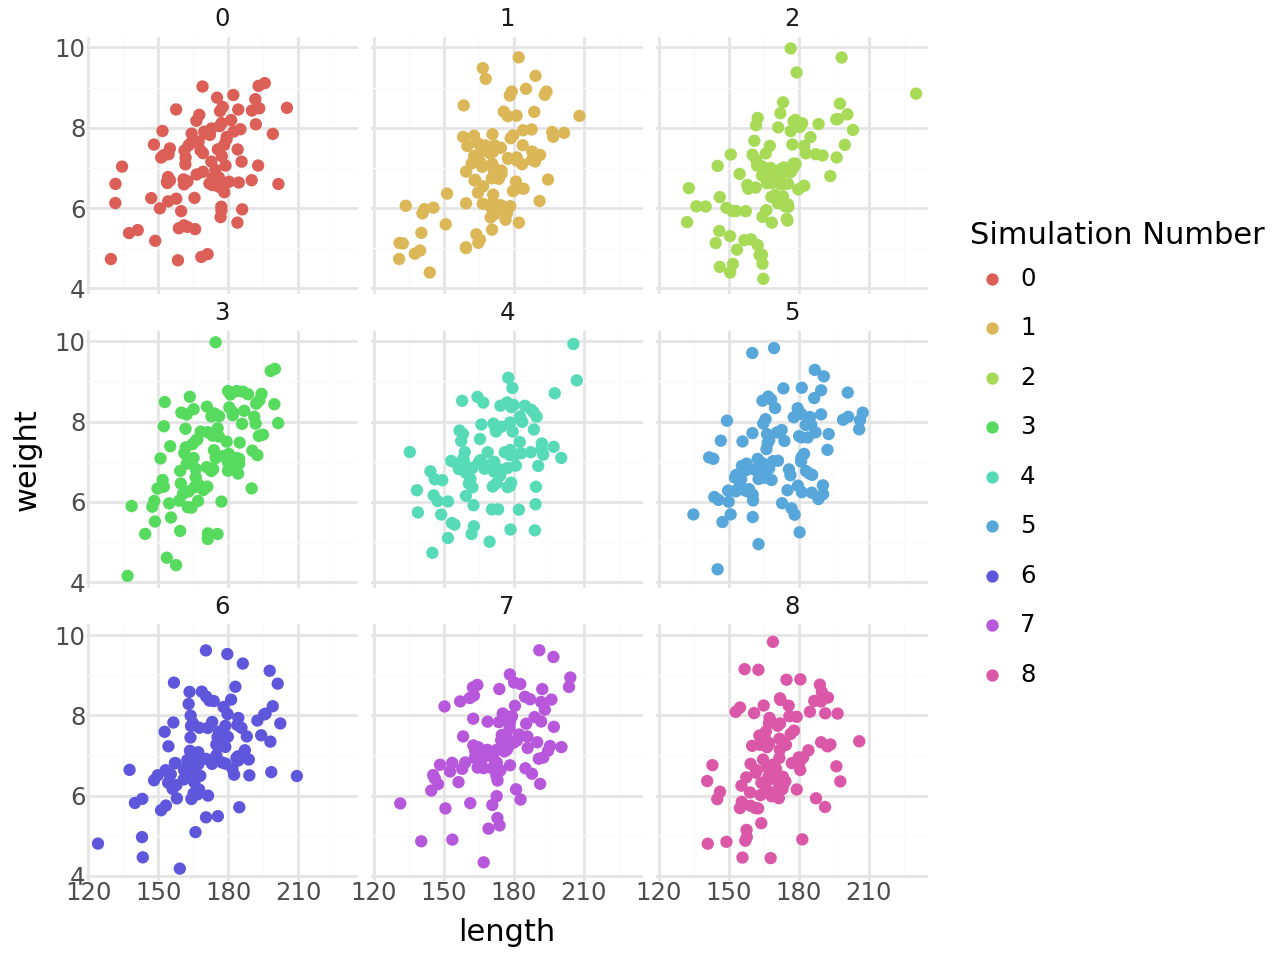

In [27]:
n_plot = 9

chosen_datasets = data_df["simulation_no"] < 9

(ggplot(data_df.loc[chosen_datasets], aes(x = "length", y = "weight", color = "factor(simulation_no)")) +
geom_point() +
facet_wrap("~simulation_no") +
theme_minimal() +
labs(color = "Simulation Number"))

Let's look at the coefficient values from all the linear regressions we ran.

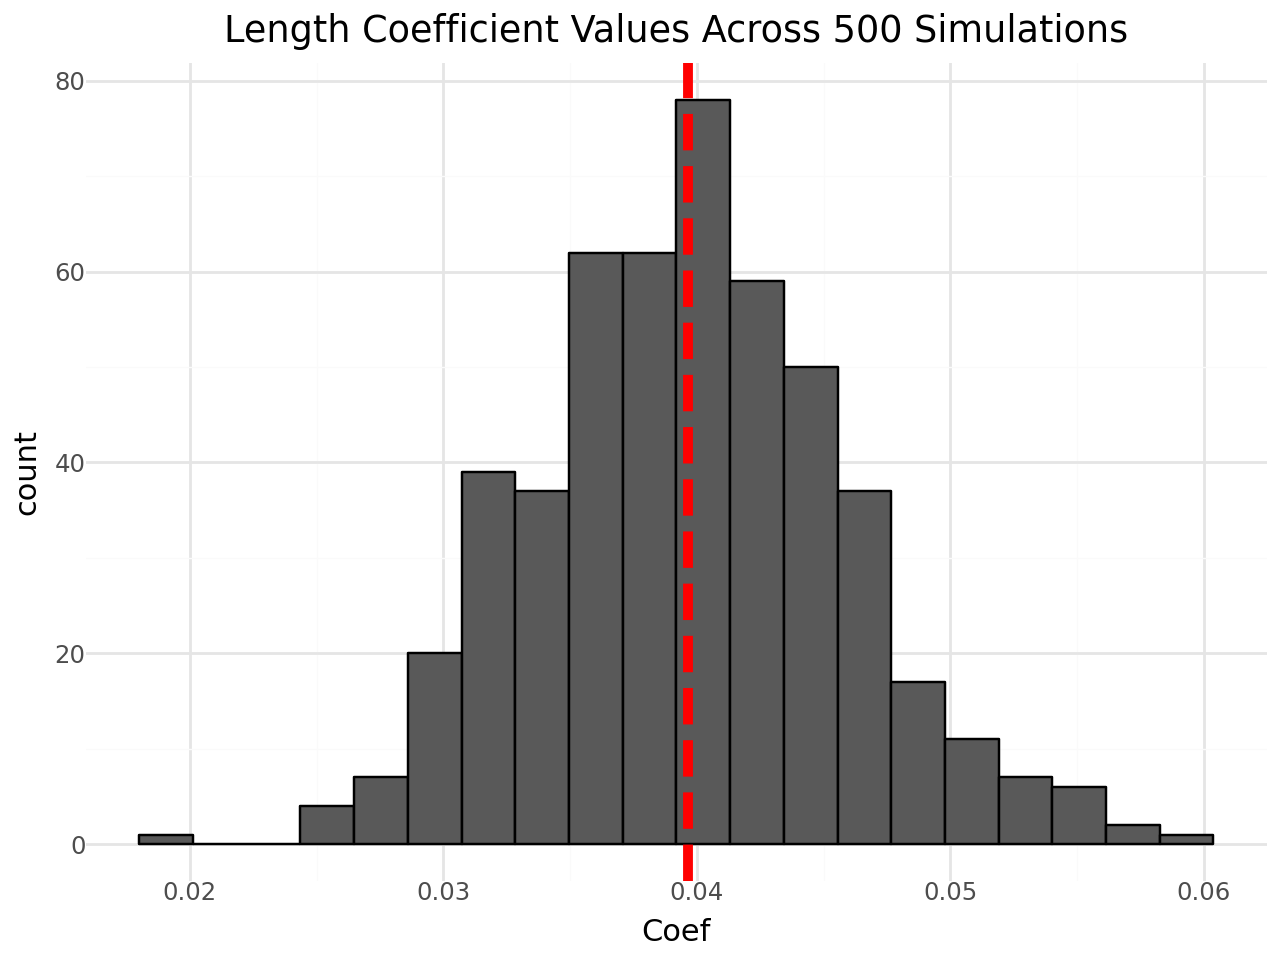

In [28]:
# plot legnth coef values and mean length coef value (red line)----
coef_only = coef_df["Names"] == "length"


(ggplot(coef_df.loc[coef_only], aes(x = "Coef")) +
geom_histogram(color = "black") +
geom_vline(xintercept = coef_df.loc[coef_only, "Coef"].mean(), color = "red", linetype = "dashed", size = 2) +
labs(title = "Length Coefficient Values Across 500 Simulations") +
theme_minimal())

In [29]:
print("The mean coefficient for length across the 500 simulations is: " + str(coef_df.loc[coef_only, "Coef"].mean()))

The mean coefficient for length across the 500 simulations is: 0.03964458623497787


### *Question*

Look at the different values you got for the coefficient of length. We set the TRUE coefficient value to be 0.04, think about and describe how spread apart the estimates from our 500 regression models are. Does seeing how different our coefficient estimates can be *change* how you think about the coefficient estimates you get in regression models on real data?

<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" alt="Q" style="width: 200px;"/>

### YOUR ANSWER HERE ###

The 500 slope estimates make a bell-shaped curve centered pretty close to the true slope of 0.04. Most of the estimates fall near that value, but a few are farther away, which just shows that any single sample can over- or under-estimate the true slope by a noticeable amount just by chance.

This makes me realize that a single regression result isn’t the “exact truth.” It’s just one estimate out of many possible ones. In practice, that means I should pay attention to the uncertainty (like confidence intervals) and not overreact to small differences, since bigger samples would tighten up the spread and noisier data would make it wider.

# 3. Fitting MORE Linear Regressions on Multiple Datasets

This is your chance to play around with the different values in our simulation. Play around with these values to get a better understanding of how different values effect our linear regression output.

### *Question*
Here are some suggestions:

* Change `n`, the number of data points in each sample, to be very small (say 10), how does this change the results you saw?
* Change `n`, the number of data points in each sample, to be very large (say 1,000), how does this change the results you saw?
* Change the `error_sd` term, this is a measure of how much error is in the model. More error means that data is scattered tightly around the regression line, less error means that the data is scatters very loosely around the regression line. How does changing  `error_sd` change the results you originally saw?

<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" alt="Q" style="width: 200px;"/>

In [30]:
#run regression simulation 500 times----

#--- play around with these numbers-------
n = 100
trueCoef = 0.04
intercept = intercept
error_sd = 5
#-----------------------------------------

iWouldRun500More = [lr(n = n, trueCoef = trueCoef, intercept = intercept, error_sd = error_sd) for x in range(0,500)]

# grab coefficients from 500 simulations
coef_df2 = pd.concat([x["coef"] for x in iWouldRun500More])

# grab coefficients from 500 simulations
data_df2 = pd.concat([x["data"] for x in iWouldRun500More])

# number simulations 0:499
data_df2["simulation_no"] = sorted(list(range(0,500))*n)
coef_df2["simulation_no"] = sorted(list(range(0,500))*2)

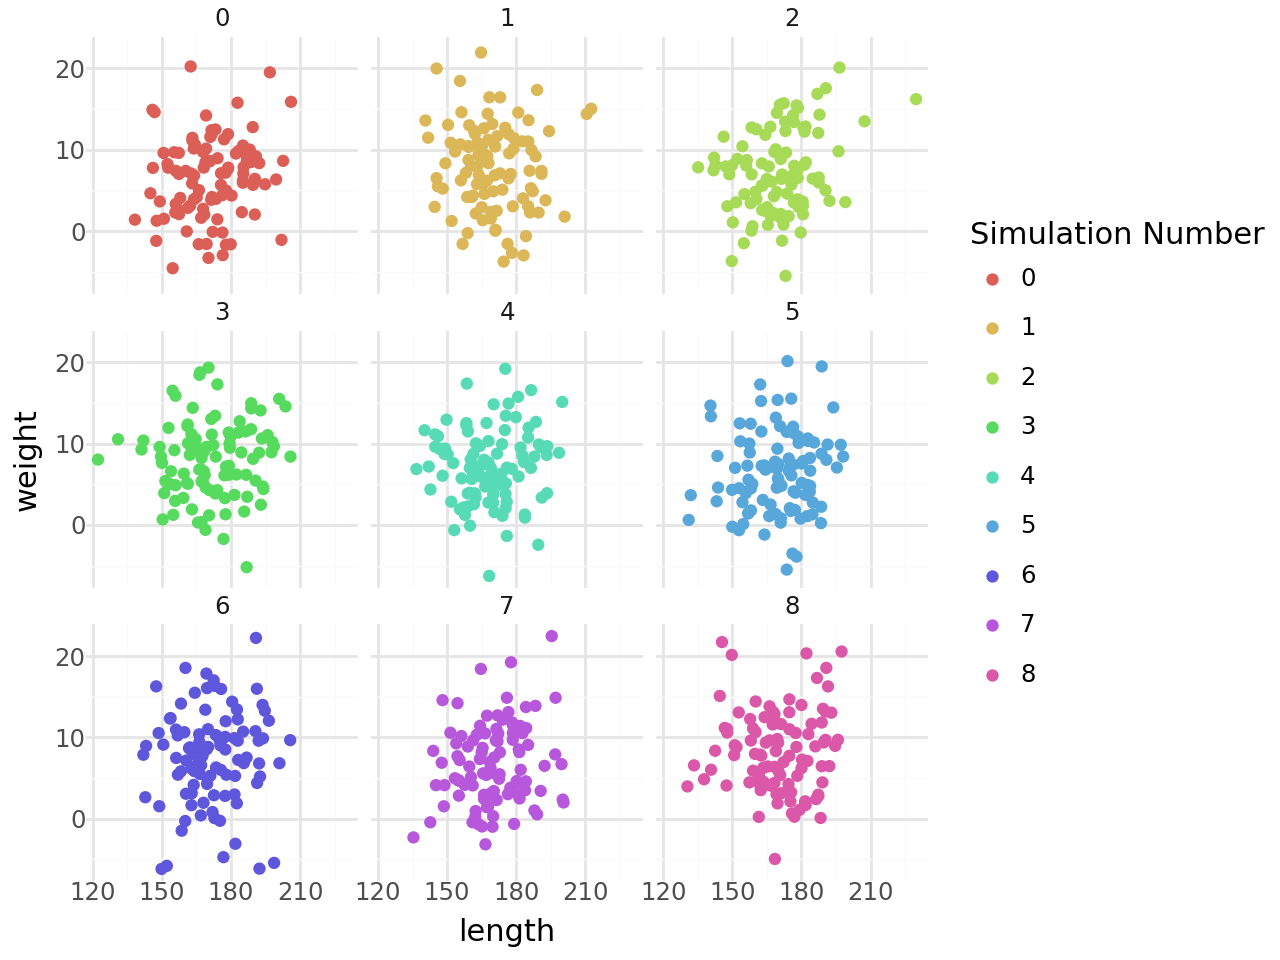

In [31]:
# plot a few of the simulated data ----

### YOUR CODE HERE ###
n_plot = 9
chosen_datasets = data_df2["simulation_no"] < n_plot
(ggplot(data_df2.loc[chosen_datasets], aes(x = "length", y = "weight", color = "factor(simulation_no)")) +
geom_point() +
facet_wrap("~simulation_no") +
theme_minimal() +
labs(color = "Simulation Number"))

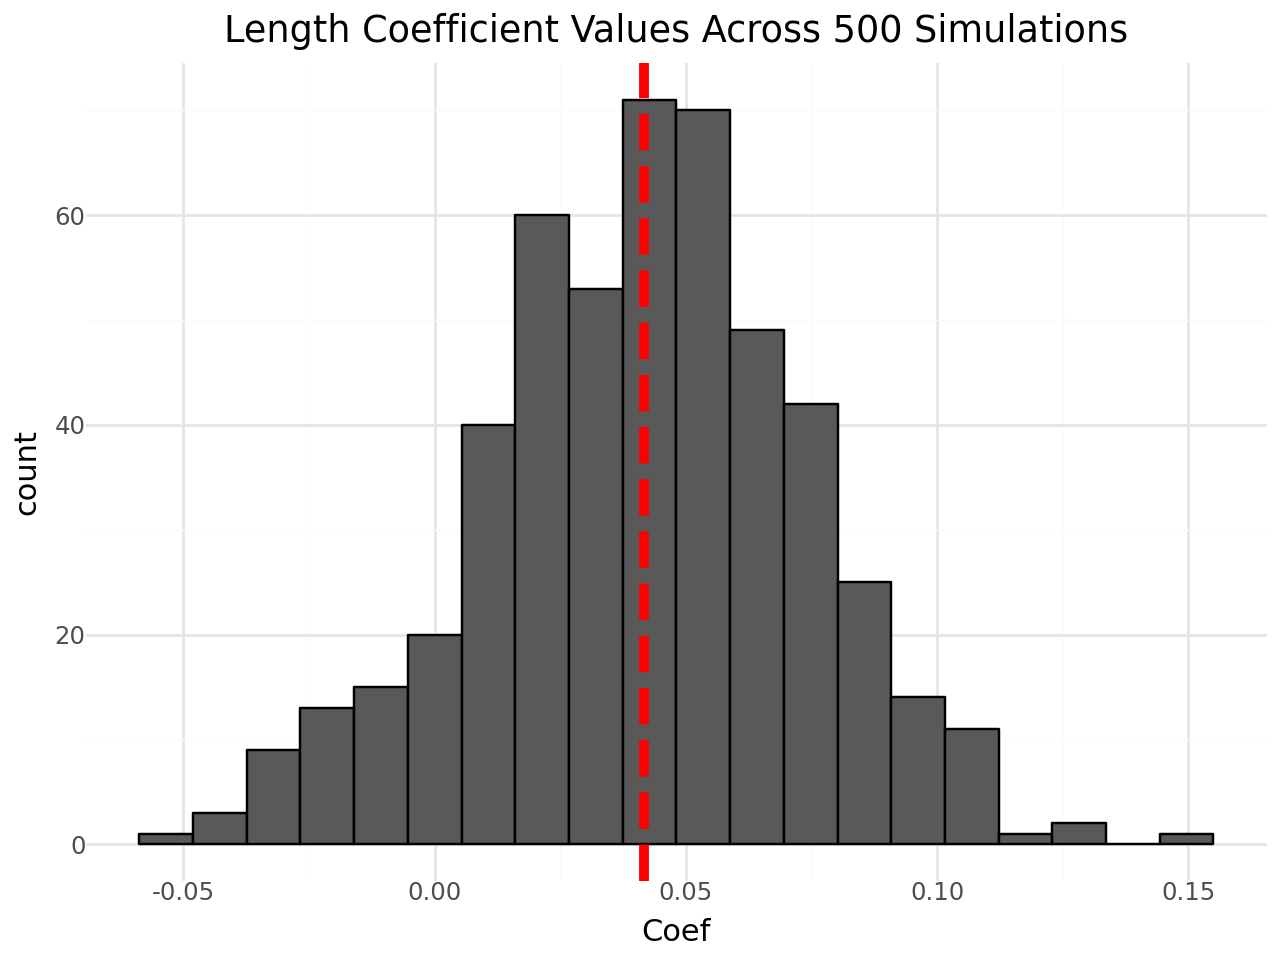

In [32]:
# plot the coefficients and EXPLORE! ----

### YOUR CODE HERE ###
coef_only = coef_df2["Names"] == "length"
(ggplot(coef_df2.loc[coef_only], aes(x = "Coef")) +
geom_histogram(color = "black") +
geom_vline(xintercept = coef_df2.loc[coef_only, "Coef"].mean(), color = "red", linetype = "dashed", size = 2) +
labs(title = "Length Coefficient Values Across 500 Simulations") +
theme_minimal())

### YOUR REFLECTIONS HERE ###

When n = 10, the scatterplots are super noisy and the histograms of slopes are really spread out. The estimates for the slope jump around a lot, sometimes way off from the true value of 0.04. With such a tiny sample, a single unusual point can swing the regression line a ton.

When n = 100, the scatter is still there but much more stable. The histogram of slopes is narrower, so the estimates hover closer to the true value most of the time.

When n = 1000, the slope estimates are packed really tightly around 0.04. The histogram is very narrow, which shows that with a large enough sample, the regression basically nails the true slope every time.

**Takeaway:** Small samples -> unstable estimates. Big samples -> precise estimates that concentrate around the true values.


With error_sd = 0.1, the points basically hug the regression line. The scatterplots look really tight, and the slope estimates across simulations are extremely close to the true value (the histogram is super narrow). That means very little noise, so the model nails the relationship almost every time.

With error_sd = 1, the data is more spread out, but the estimates are still centered near the true slope. The histogram is wider than with 0.1, which shows more variability in the slope estimates from sample to sample.

With error_sd = 5, the scatterplots look messy and points are spread far away from the line. The histogram of slopes is much wider, meaning some estimates are pretty far from the true value. Even though the average slope is still about right, any single sample could give you a slope that’s way off.

**Takeaway:** Lower error = precise and consistent estimates. Higher error = more scattered data, noisier estimates, and less trust in a single regression result.


### *Question*
In prediction models, we often care most about the *accuracy* of the model. In Linear Regression we often measure that using the mean squared error. Using the `mean_squared_error()` function from sklean, and the other code in this notebook as an example, change the function `lr()` below to calculate and store the mean squared error for each regression in a new dataframe, `mse`, and add it to the dictionary that the function returns. Then run the function 500 times, and plot a histogram of the mean squared errors.

What does this histogram tell you about the accuracy of our models?

<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" alt="Q" style="width: 200px;"/>

In [33]:
def lr(n = 100, trueCoef = 0.04, intercept = 0.2, error_sd = 1):

    # mean cat length in cm
    mean_length_cm = 170
    # standard deviation of cat length in cm
    sd_length_cm = 15

    # generate random data for cat length that follows a normal distribution
    length = np.random.normal(loc = mean_length_cm, scale = sd_length_cm, size = n)

    # weight = intercept + length*coefficient + random error
    weight = intercept + length*true_coef + np.random.normal(0,error_sd,n)


    cats = pd.DataFrame({"length": length, "weight": weight})


    features = ["length"]
    X = cats[features]
    y = cats[["weight"]] #if you don't have the extra brackets, y will be a series instead of an array and throw an error

    ##############################################
    # run a linear regression
    lr = LinearRegression() # create the model object

    # fit the model
    lr.fit(X,y)
    ##############################################

    ##### ADD MSE CODE HERE ######
    mse = mean_squared_error(y, lr.predict(X))
    mse_df = pd.DataFrame({"mse": [mse]})
    ###############################

    # grab the coefficients from the model and store them in a data frame
    coef = pd.DataFrame({"Coef": lr.coef_[0], "Names": features})
    coef = coef._append({"Coef": lr.intercept_[0], "Names": "intercept"}, ignore_index = True)

    ##############################################
    return({"coef": coef, "data": cats, "mse": mse_df}) ##### DON'T FORGET to add the new mse data frame too! #####
    ##############################################

In [34]:
# Run your new simulations-----

iWouldRun500More2 = [lr(n = n, trueCoef = trueCoef, intercept = intercept, error_sd = error_sd) for x in range(0,500)]

# grab coefficients from 500 simulations
coef_df3 = pd.concat([x["coef"] for x in iWouldRun500More2])

# grab coefficients from 500 simulations
data_df3 = pd.concat([x["data"] for x in iWouldRun500More2])

# grab mse from 500 simulations
mse_df3 = pd.concat([x["mse"] for x in iWouldRun500More2])

# number simulations 0:499
data_df3["simulation_no"] = sorted(list(range(0,500))*n)
coef_df3["simulation_no"] = sorted(list(range(0,500))*2)
mse_df3["simulation_no"] = list(range(0,500))

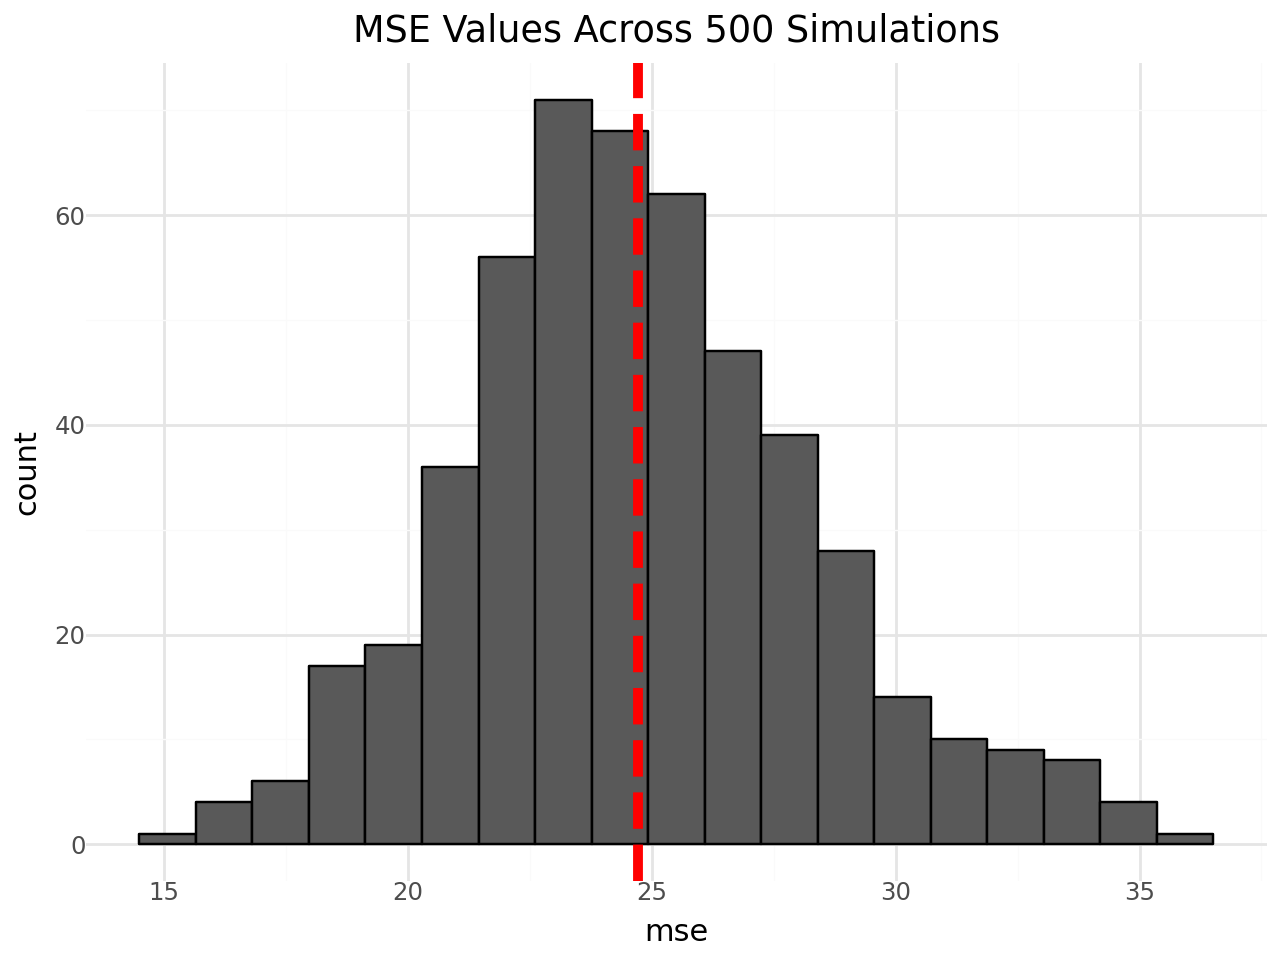

In [35]:
# plot newly calculated mses ----
(ggplot(mse_df3, aes(x = "mse")) +
geom_histogram(color = "black") +
geom_vline(xintercept = mse_df3["mse"].mean(), color = "red", linetype = "dashed", size = 2) +
labs(title = "MSE Values Across 500 Simulations") +
theme_minimal())

### YOUR ANSWERS HERE ###

The histogram shows that most of the MSE values land around 25, so the model is pretty consistent across the 500 runs. There’s some spread because of randomness and noise, but overall the errors don’t jump around too much. Basically, this means our regression is doing a solid job and we can expect a similar level of accuracy most of the time.

# 4. Interpreting Linear Regression Coefficients

While sometimes we just want the predictions from a linear regression model, we often will be asked to interpret the coefficients as well.

Use the table of coefficients you create below to answer the following questions.

### *Question*

* Do you think the assumption of linearity is valid for this model?
* How will a 1 oz increase in weight change the predicted value for Amazon Price?
* What does the intercept represent?
* Using the values from the coefficient table, predict the Amazon Price for a book that has a list price of 15.99, a Weight of 4 oz, and 428 pages. Show your work using code.
* If we took another random sample of Amazon books from the same population, how do you expect the coefficients from the model would/could change?

<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" alt="Q" width = 200px/>

In [36]:
d = pd.read_table("https://raw.githubusercontent.com/ywen2021/CPSC392/main/Data/amazon-books.txt")
predictors = ["List Price", "Weight (oz)", "NumPages"]
outcome = ["Amazon Price"]
##############################################

#get rid of missing values
d = d.dropna()
# z score predictors

#z_score=StandardScaler()
#d[predictors]=z_score.fit_transform(d[predictors])

# create regression
lr = LinearRegression()

# fit model
lr.fit(d[predictors],d[outcome])

##############################################


LinearRegression()

In [37]:
##############################################
# print out table of coefficients
coef_df4 = pd.DataFrame({
    "Predictor": ["Intercept"] + predictors,
    "Coefficient": [lr.intercept_[0]] + list(lr.coef_[0])
})

print(coef_df4)
##############################################
